In [ ]:
pip install pyarrow

In [ ]:
pip install fastparquet

In [1]:
import pandas as pd
import glob
import os

In [2]:
folder_path = 'data'

In [3]:
parquet_files = glob.glob(os.path.join(folder_path, '*.parquet'))

In [4]:
df = pd.concat([pd.read_parquet(file) for file in parquet_files], ignore_index=True)

In [5]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-02-01 00:04:45   2024-02-01 00:19:58              1.0   
1         2  2024-02-01 00:56:31   2024-02-01 01:10:53              1.0   
2         2  2024-02-01 00:07:50   2024-02-01 00:43:12              2.0   
3         1  2024-02-01 00:01:49   2024-02-01 00:10:47              1.0   
4         1  2024-02-01 00:37:35   2024-02-01 00:51:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.39         1.0                  N            68           236   
1           7.71         1.0                  N            48           243   
2          28.69         2.0                  N           132           261   
3           1.10         1.0                  N           161           163   
4           2.60         1.0                  N           246            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         20.5    1.0      0.5        1.28          0.00   
1             1         31.0    1.0      0.5        9.00          0.00   
2             2         70.0    0.0      0.5        0.00          6.94   
3             1          9.3    3.5      0.5        2.85          0.00   
4             2         15.6    3.5      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.78                   2.5         0.00  
1                    1.0         45.00                   2.5         0.00  
2                    1.0         82.69                   2.5         1.75  
3                    1.0         17.15                   2.5         0.00  
4                    1.0         20.60                   2.5         0.00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554778 entries, 0 to 9554777
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

# Data Cleaning 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

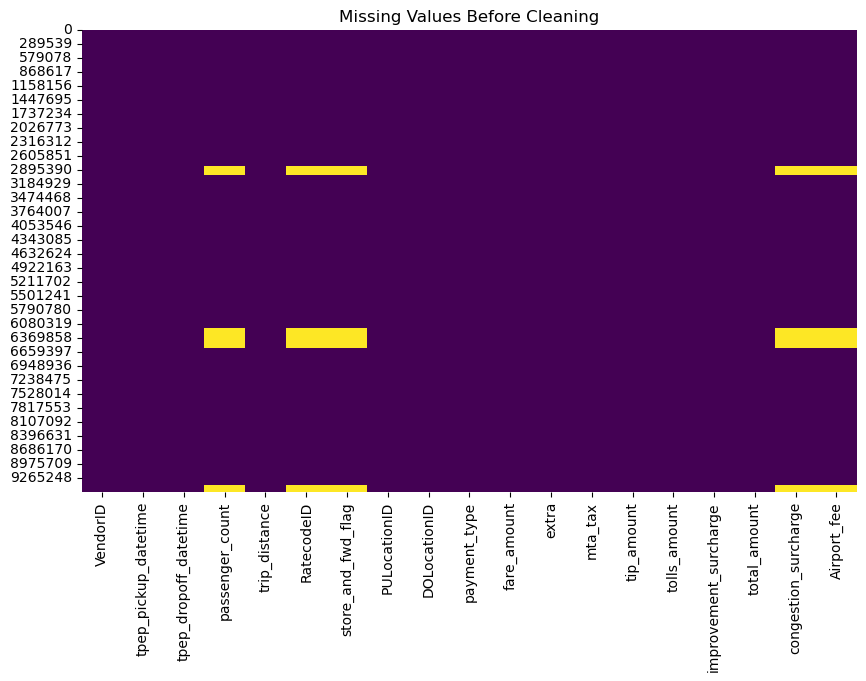

In [19]:
# Plot missing values before cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Before Cleaning")
plt.show()

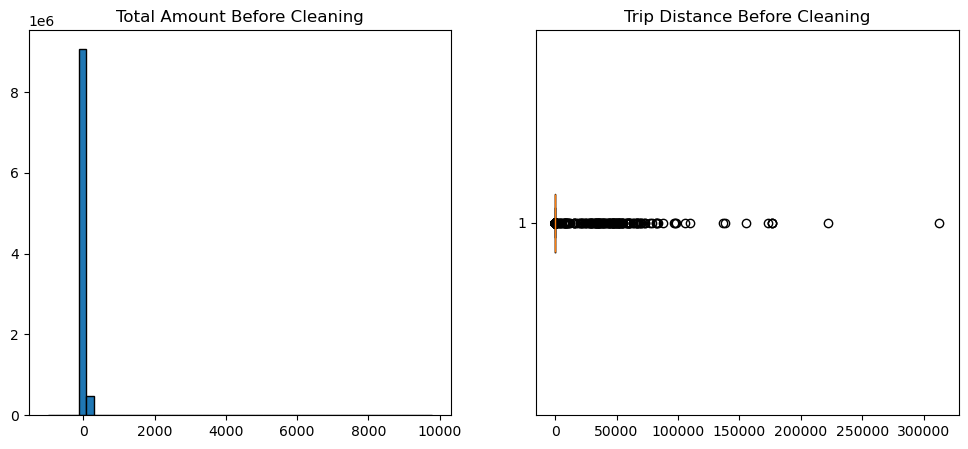

In [20]:
# Plotting 'total_amount' and 'trip_distance' before cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(df['total_amount'], bins=50, edgecolor='black')
axs[0].set_title('Total Amount Before Cleaning')
axs[1].boxplot(df['trip_distance'], vert=False)
axs[1].set_title('Trip Distance Before Cleaning')
plt.show()

In [21]:
# Data Cleaning Steps
# Step 1: Drop rows with missing values
df_cleaned = df.dropna()

# Step 2: Convert date columns to datetime (if not already)
df_cleaned['tpep_pickup_datetime'] = pd.to_datetime(df_cleaned['tpep_pickup_datetime'])
df_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(df_cleaned['tpep_dropoff_datetime'])

# Step 3: Handle Outliers in 'trip_distance' and 'total_amount'
df_cleaned = df_cleaned[(df_cleaned['trip_distance'] <= 50) & (df_cleaned['trip_distance'] > 0)]
df_cleaned = df_cleaned[(df_cleaned['total_amount'] <= 200) & (df_cleaned['total_amount'] > 0)]

/var/folders/2h/cddp4jc10c3_3lh0zb5_2fk80000gp/T/ipykernel_33173/2281083826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tpep_pickup_datetime'] = pd.to_datetime(df_cleaned['tpep_pickup_datetime'])
/var/folders/2h/cddp4jc10c3_3lh0zb5_2fk80000gp/T/ipykernel_33173/2281083826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(df_cleaned['tpep_dropoff_datetime'])


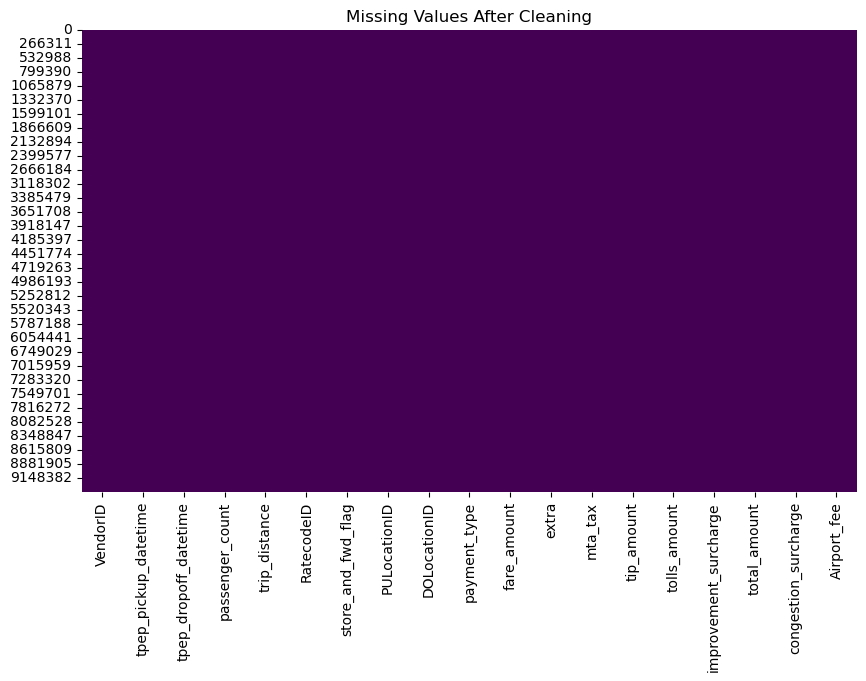

In [22]:
# Step 4: Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Plot missing values after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values After Cleaning")
plt.show()

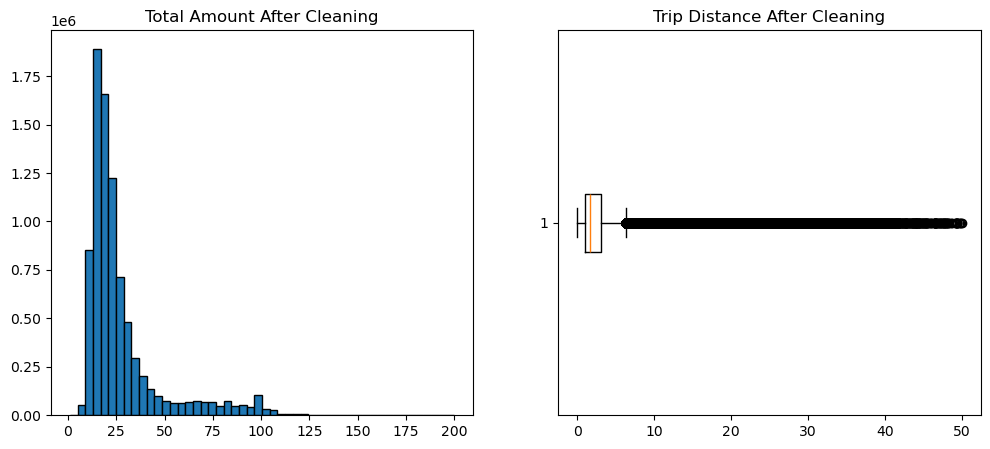

In [23]:
# Plotting 'total_amount' and 'trip_distance' after cleaning
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(df_cleaned['total_amount'], bins=50, edgecolor='black')
axs[0].set_title('Total Amount After Cleaning')
axs[1].boxplot(df_cleaned['trip_distance'], vert=False)
axs[1].set_title('Trip Distance After Cleaning')
plt.show()

In [24]:
# Summary after cleaning
print("Summary After Cleaning:")
print(df_cleaned.describe())

Summary After Cleaning:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  8.577360e+06                     8577360                     8577360   
mean   1.756751e+00  2024-02-16 19:35:54.098883  2024-02-16 19:52:07.977046   
min    1.000000e+00         2002-12-31 22:17:10         2002-12-31 22:42:24   
25%    2.000000e+00         2024-01-25 16:01:30  2024-01-25 16:20:13.750000   
50%    2.000000e+00         2024-02-17 01:53:49  2024-02-17 02:06:33.500000   
75%    2.000000e+00  2024-03-10 03:27:17.250000  2024-03-10 03:41:06.250000   
max    2.000000e+00         2024-04-01 00:34:55         2024-04-02 09:10:04   
std    4.290445e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     8.577360e+06   8.577360e+06  8.577360e+06  8.577360e+06   
mean      1.334581e+00   3.272801e+00  2.103795e+00  1.658934e+02   
min       0.000000e+00   1.000000e-02  1.000000e+00  1.00

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8577360 entries, 0 to 9414615
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [26]:
import pandas as pd

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Filtering based on IQR
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df

# Columns where we want to remove outliers
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
df_no_outliers = remove_outliers(df_cleaned, numeric_columns)

In [27]:
df_no_outliers.count()

VendorID                 4507568
tpep_pickup_datetime     4507568
tpep_dropoff_datetime    4507568
passenger_count          4507568
trip_distance            4507568
RatecodeID               4507568
store_and_fwd_flag       4507568
PULocationID             4507568
DOLocationID             4507568
payment_type             4507568
fare_amount              4507568
extra                    4507568
mta_tax                  4507568
tip_amount               4507568
tolls_amount             4507568
improvement_surcharge    4507568
total_amount             4507568
congestion_surcharge     4507568
Airport_fee              4507568
dtype: int64

# EDA

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df_no_outliers.describe(include='all'))

Descriptive Statistics:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   4.507568e+06                     4507568                     4507568   
unique           NaN                         NaN                         NaN   
top              NaN                         NaN                         NaN   
freq             NaN                         NaN                         NaN   
mean    1.762669e+00  2024-02-16 15:31:52.748301  2024-02-16 15:43:41.722043   
min     1.000000e+00         2002-12-31 22:17:10         2002-12-31 22:42:24   
25%     2.000000e+00         2024-01-25 18:07:32         2024-01-25 18:19:31   
50%     2.000000e+00  2024-02-16 15:02:35.500000         2024-02-16 15:15:21   
75%     2.000000e+00  2024-03-09 14:53:03.250000         2024-03-09 15:05:18   
max     2.000000e+00         2024-04-01 00:34:55         2024-04-01 20:21:06   
std     4.254466e-01                         NaN                         NaN   

        passeng

In [31]:
# Data Types and Missing Values
print("\nData Types:")
print(df_no_outliers.dtypes)
print("\nMissing Values:")
print(df_no_outliers.isnull().sum())


Data Types:
VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

Missing Values:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocat

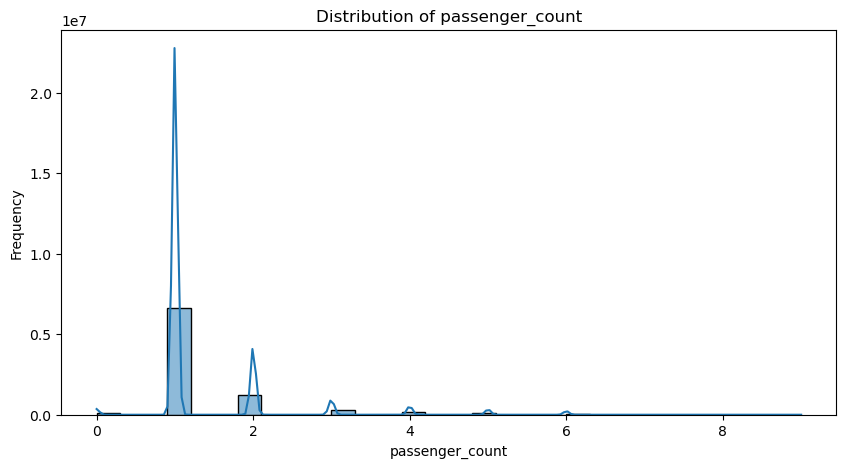

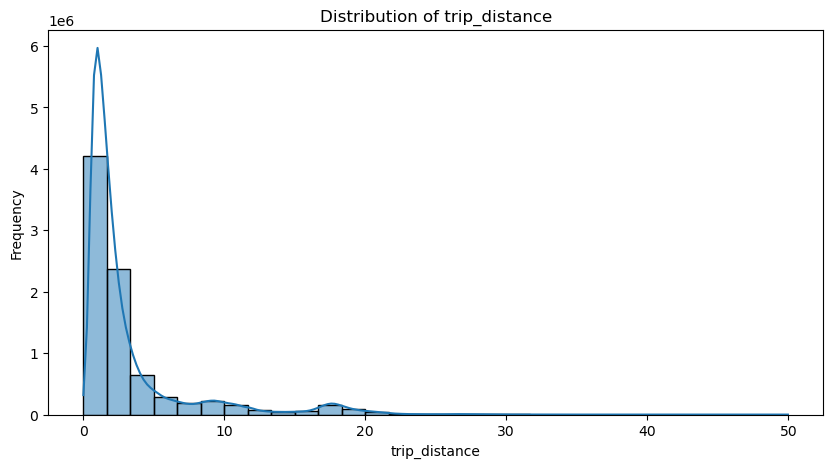

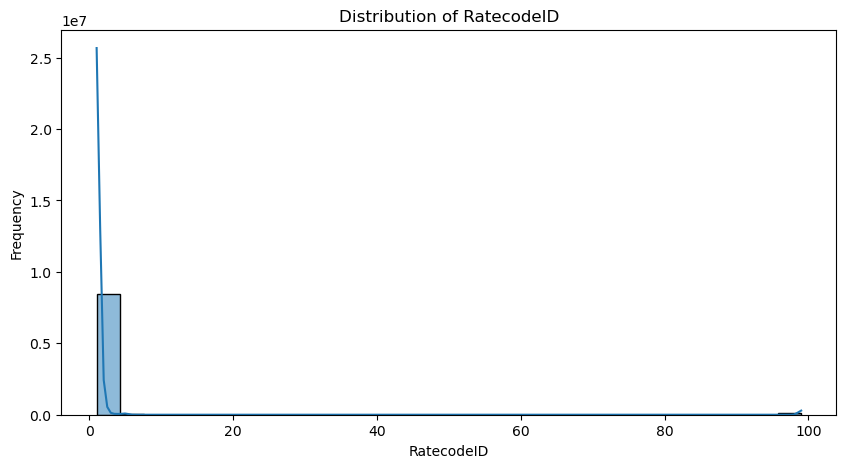

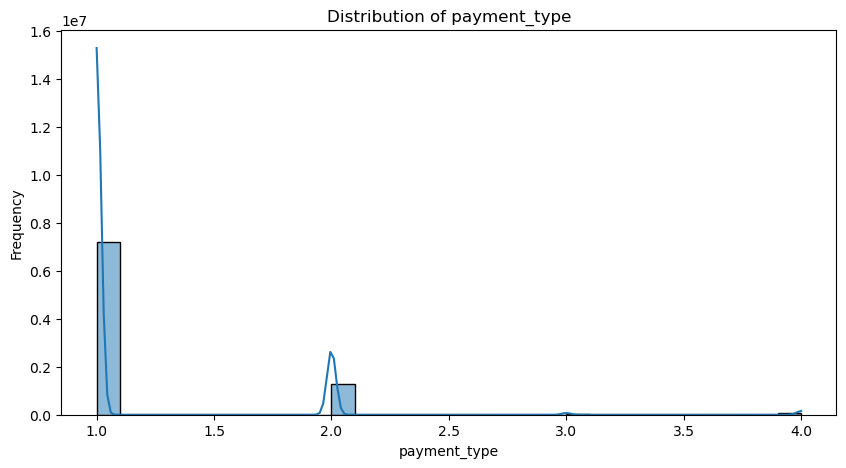

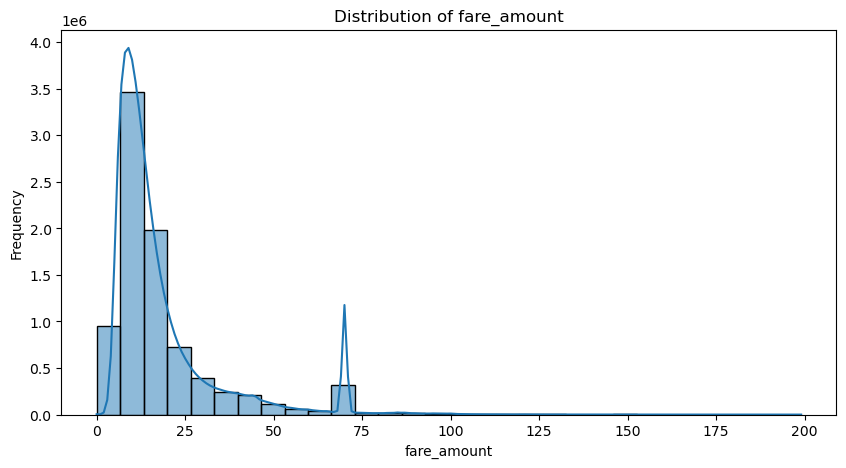

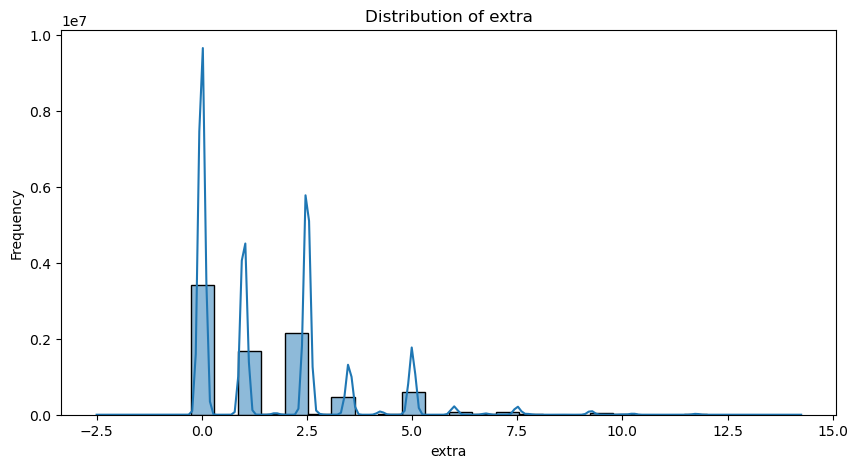

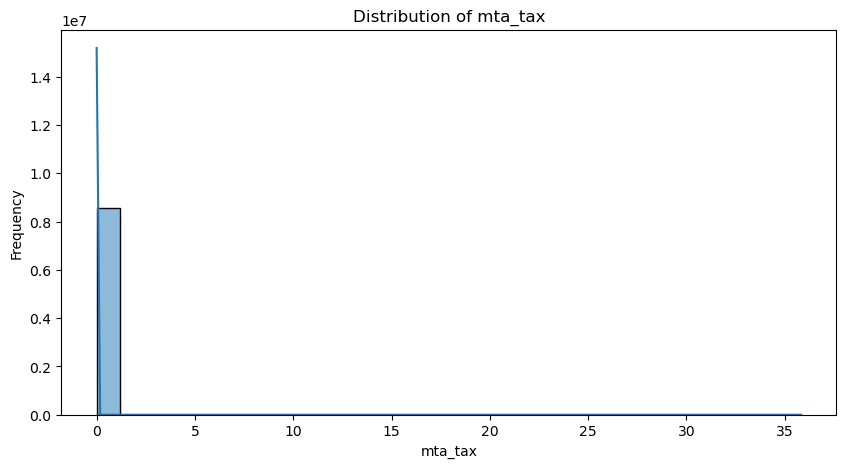

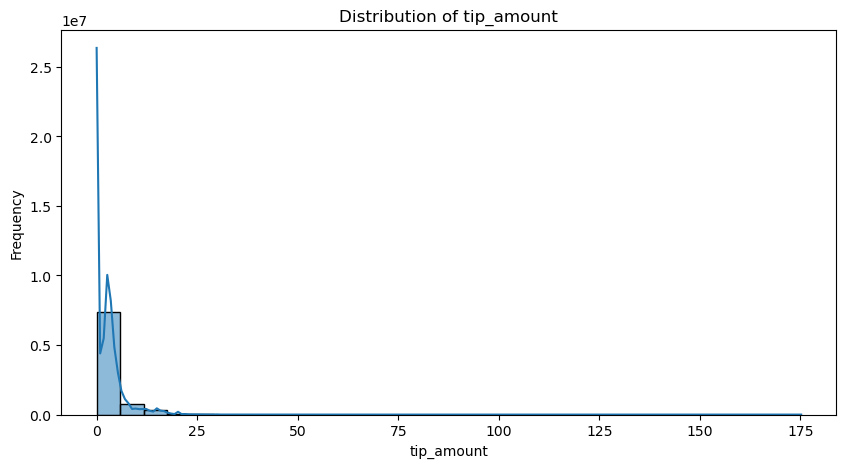

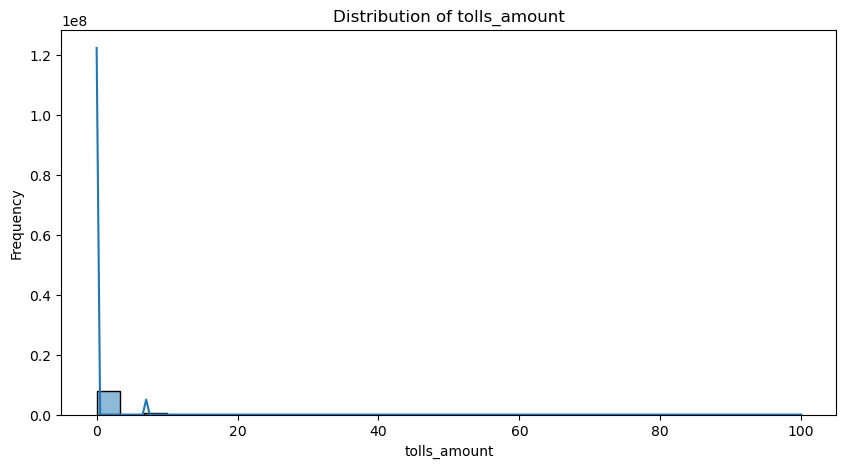

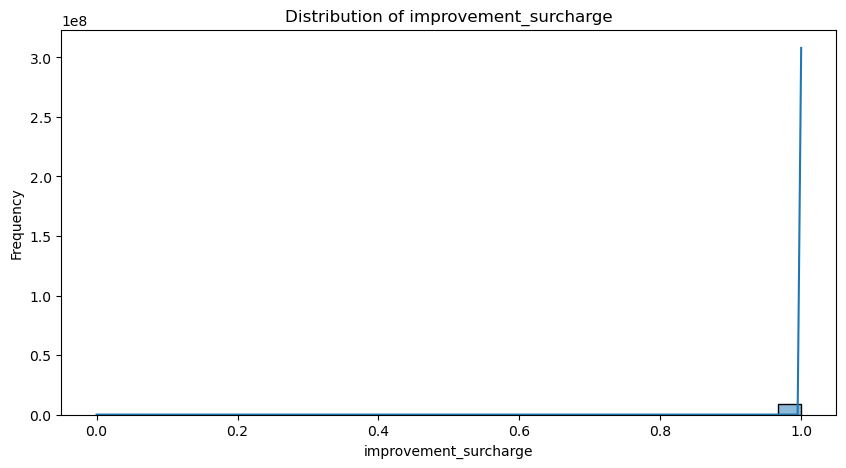

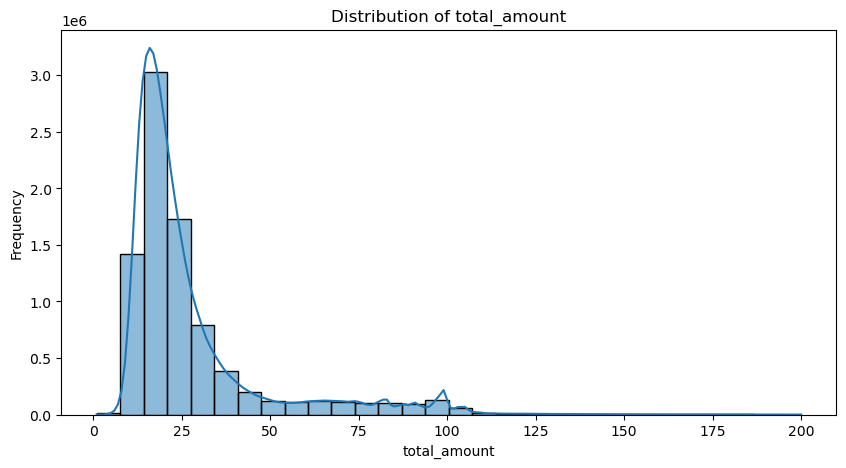

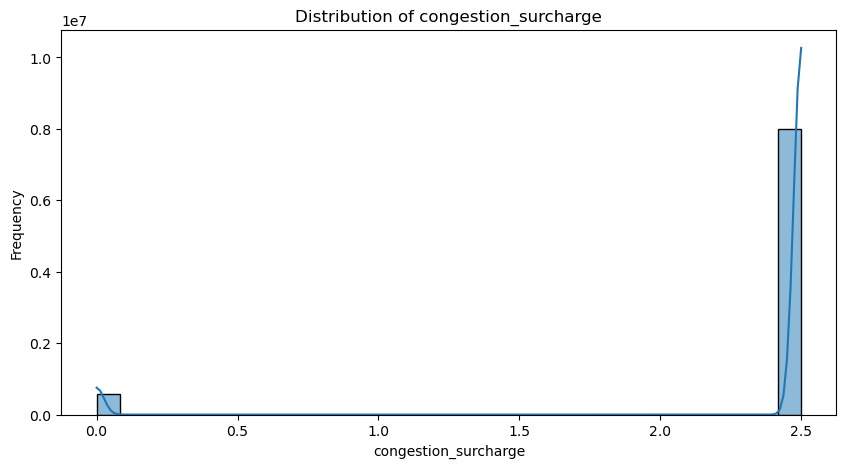

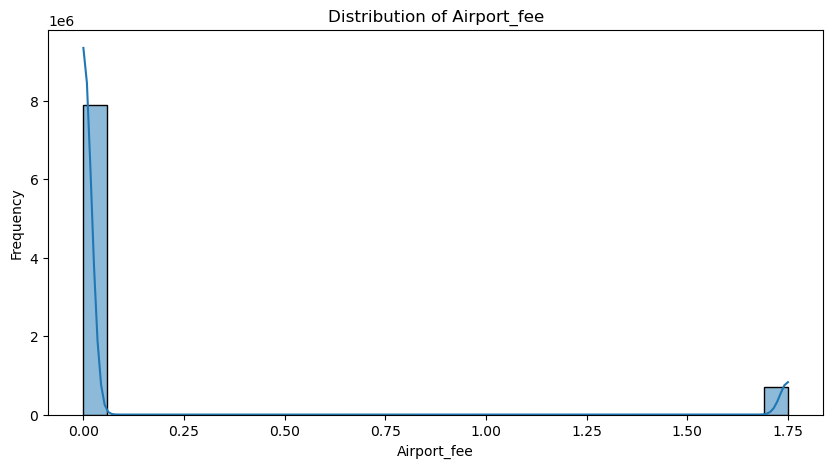

In [32]:
# 1. Distribution of Numeric Columns
numeric_columns = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

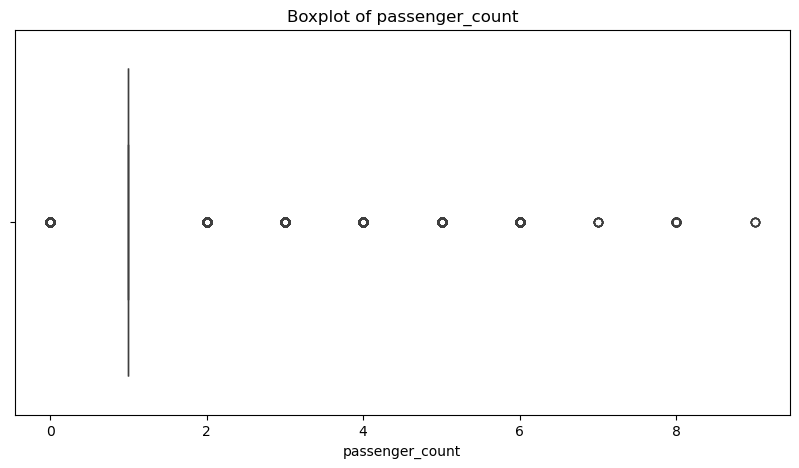

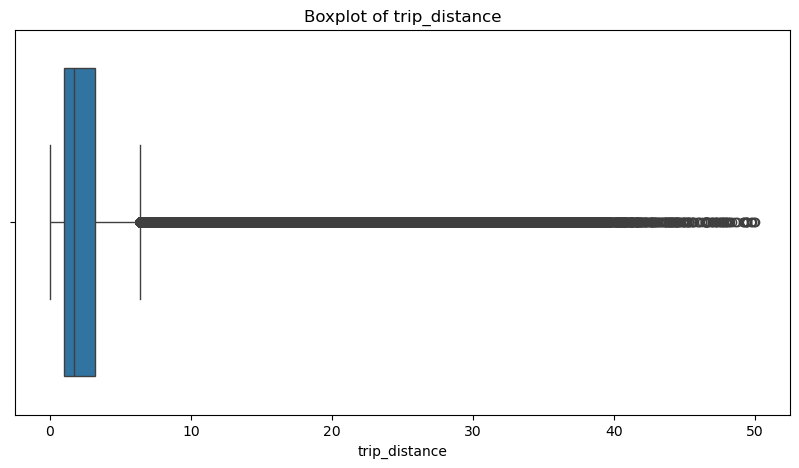

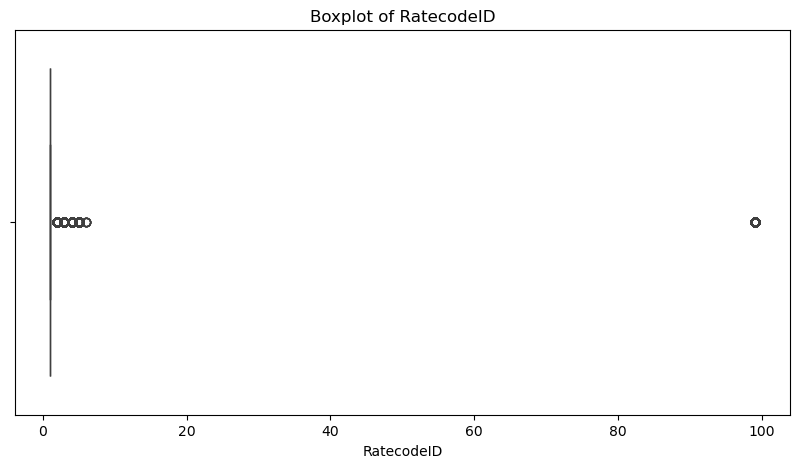

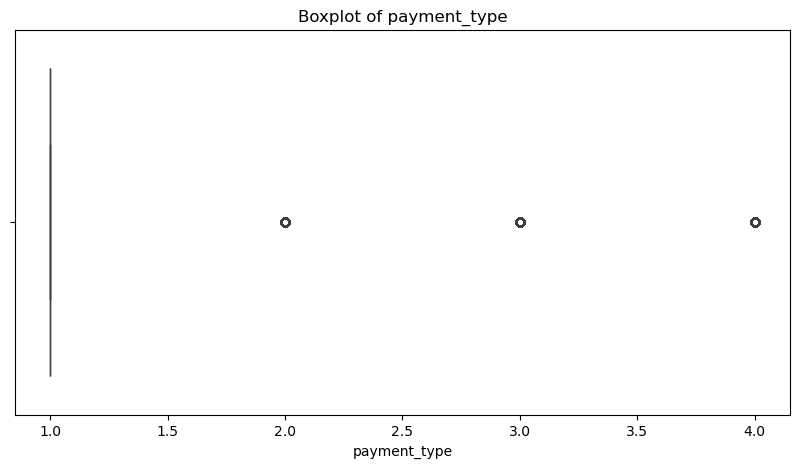

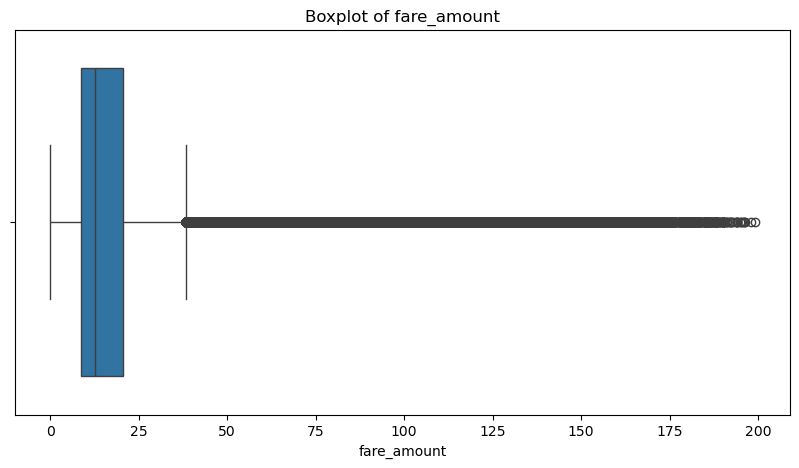

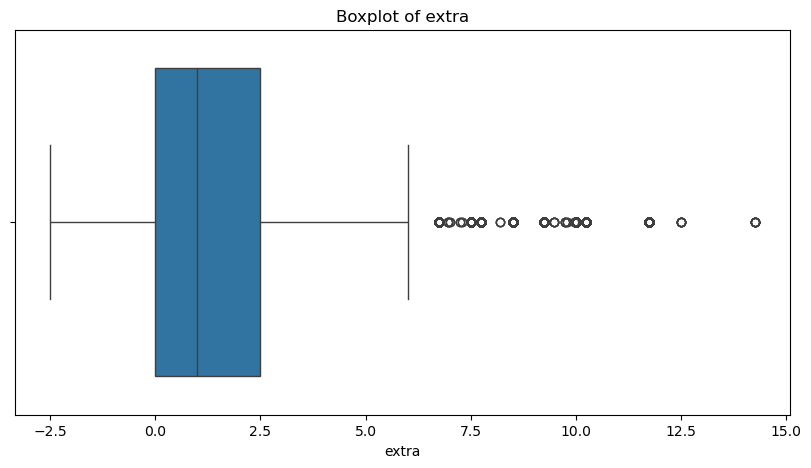

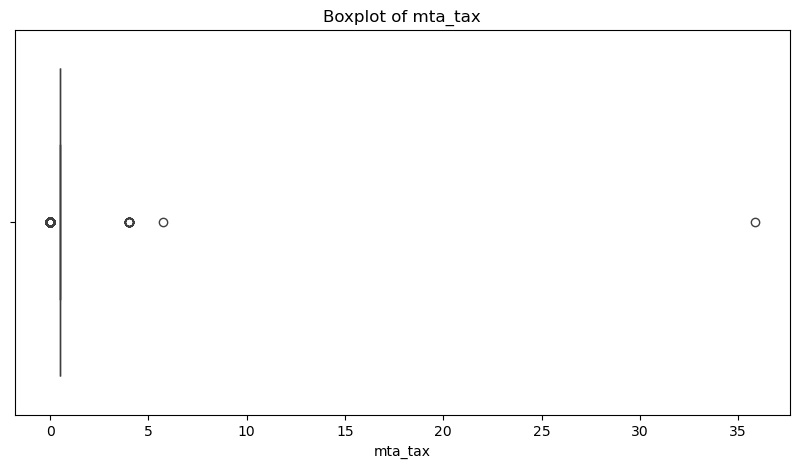

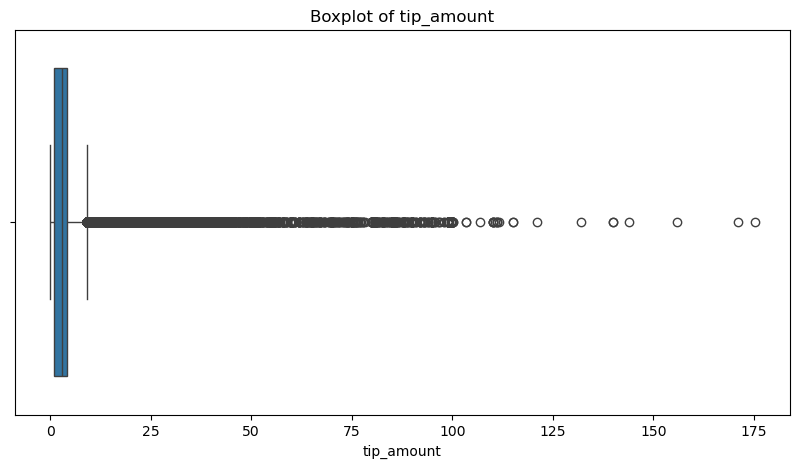

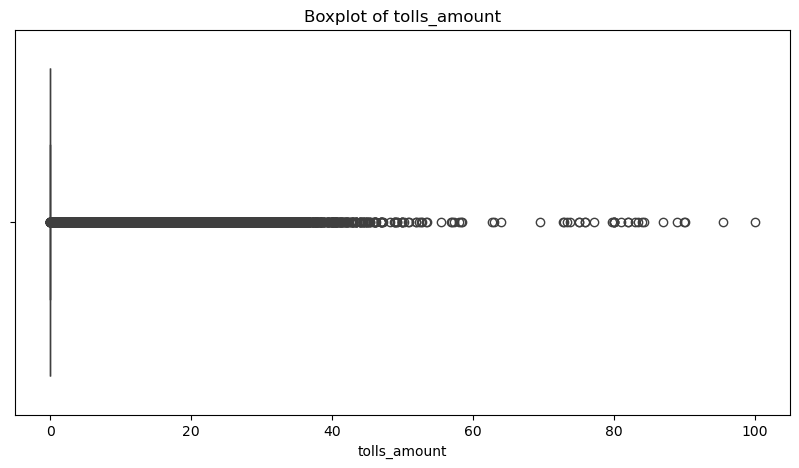

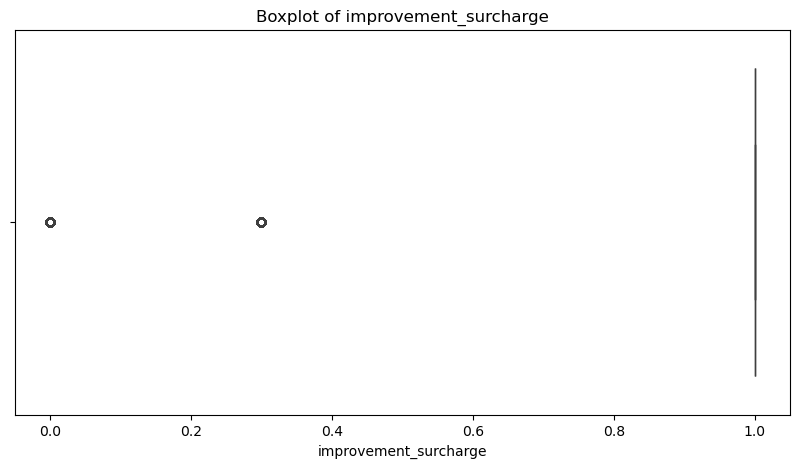

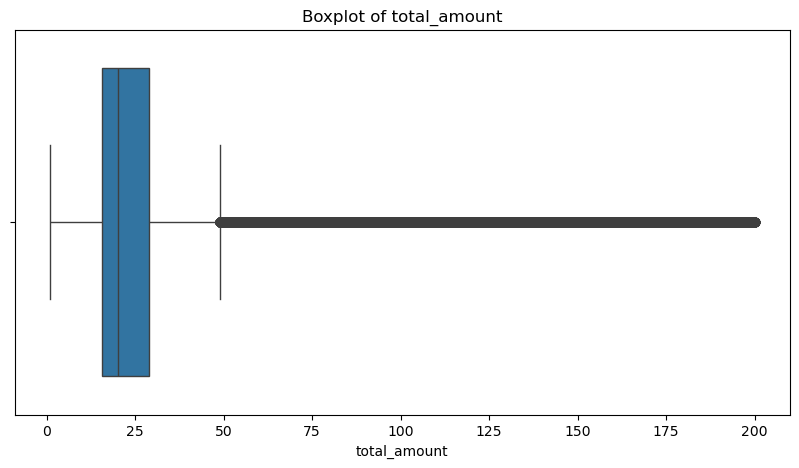

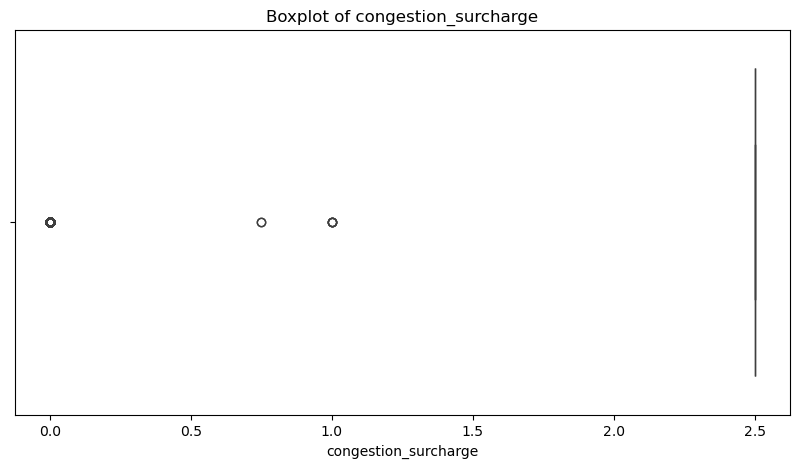

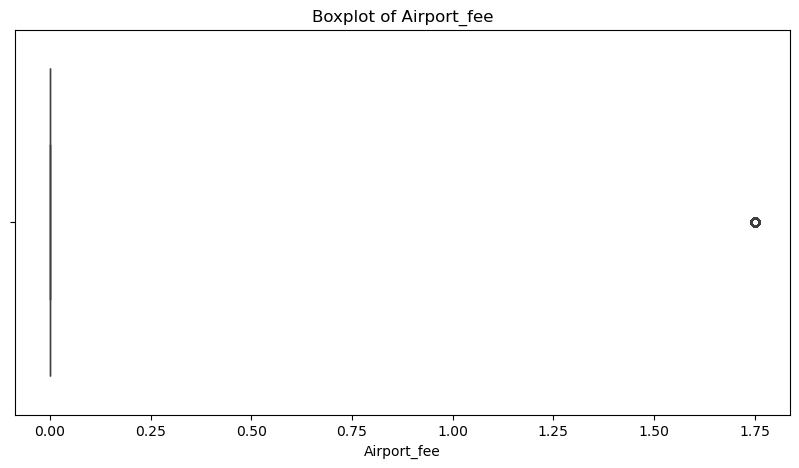

In [33]:
# 2. Boxplots for Outlier Detection
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

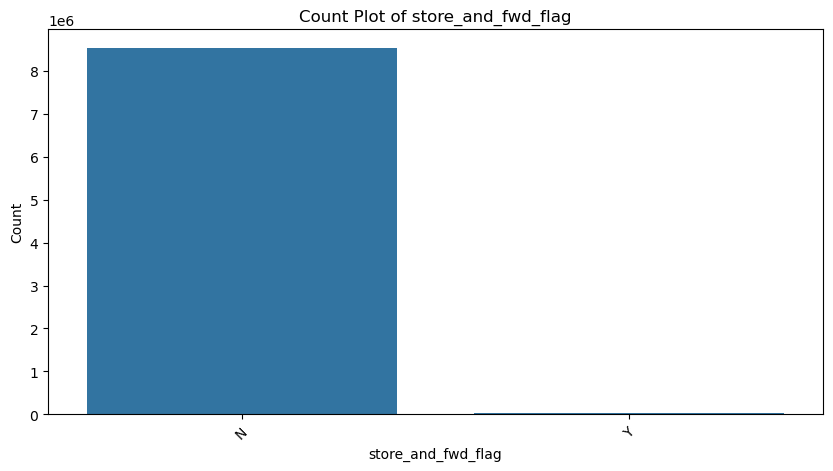

In [34]:
# 3. Count Plot for Categorical Columns
categorical_columns = df_no_outliers.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

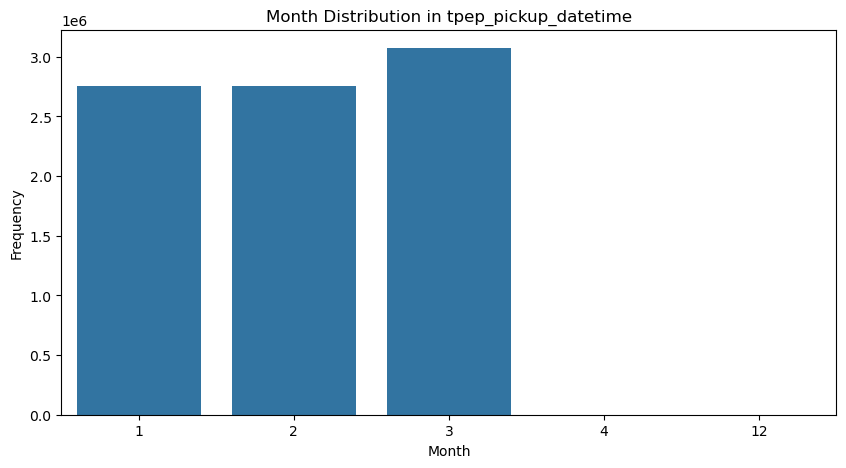

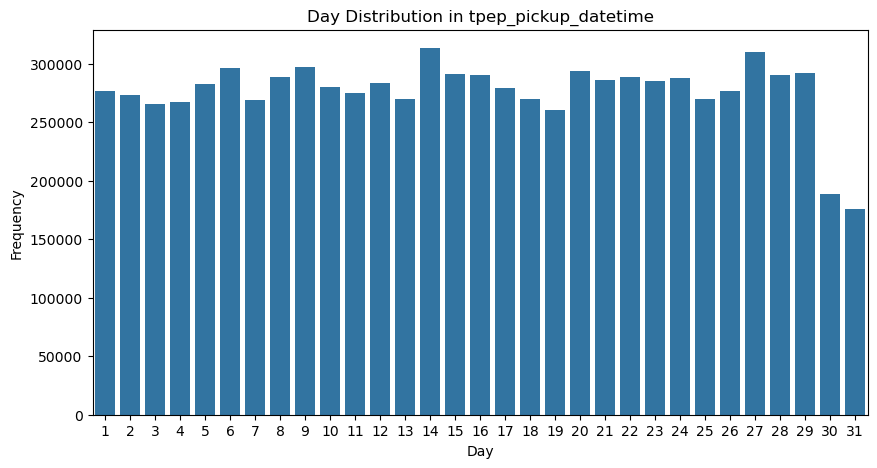

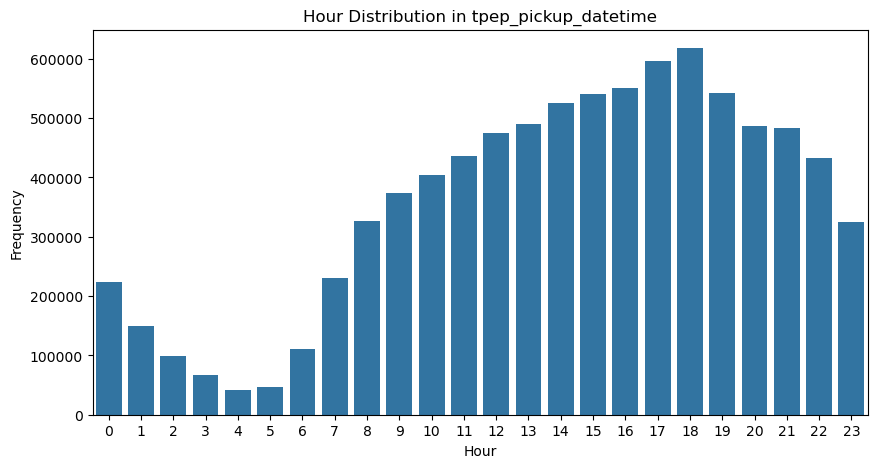

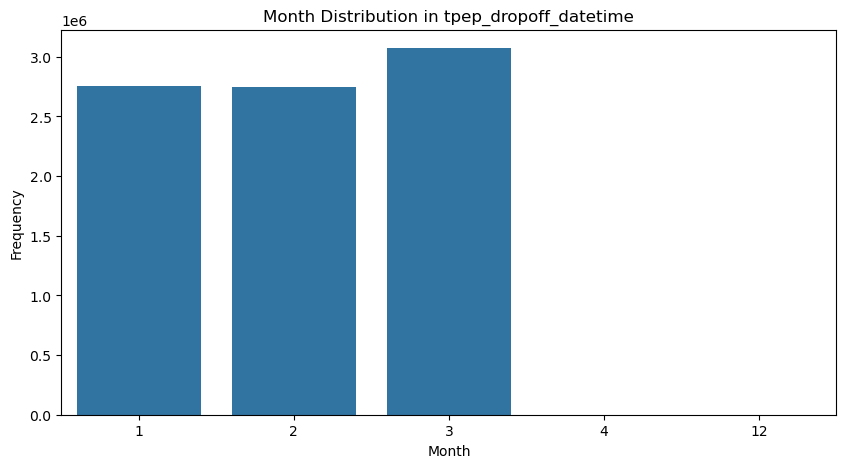

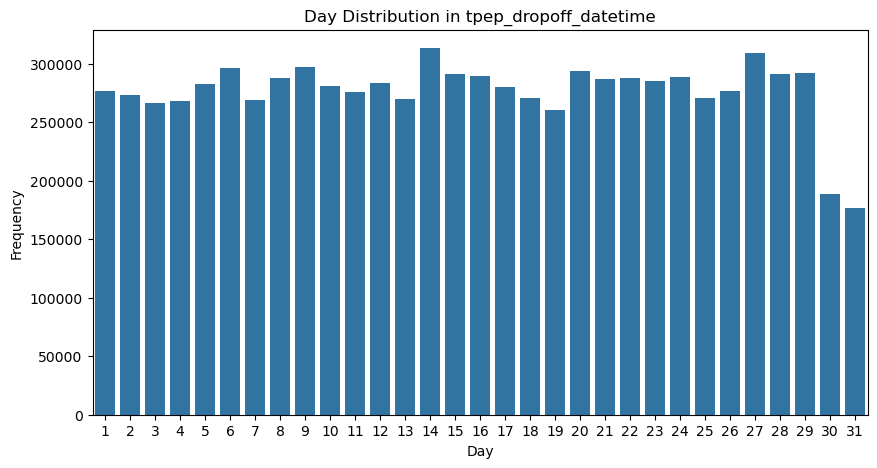

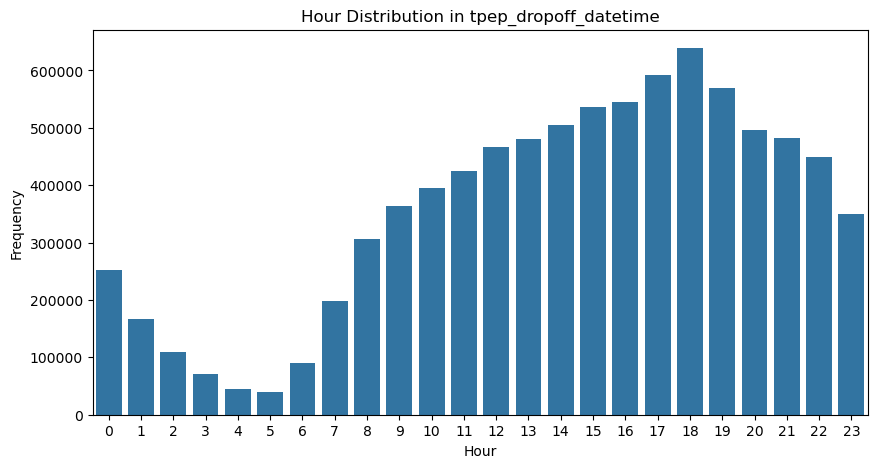

In [35]:
# 4. Time Series Analysis for Date Columns
date_columns = df_no_outliers.select_dtypes(include=['datetime64']).columns
for col in date_columns:
    # Extracting month, day, and hour for more detailed analysis
    df_cleaned['Month'] = df_cleaned[col].dt.month
    df_cleaned['Day'] = df_cleaned[col].dt.day
    df_cleaned['Hour'] = df_cleaned[col].dt.hour

    # Plotting distribution by Month, Day, and Hour
    for time_unit in ['Month', 'Day', 'Hour']:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df_cleaned, x=time_unit)
        plt.title(f'{time_unit} Distribution in {col}')
        plt.xlabel(time_unit)
        plt.ylabel('Frequency')
        plt.show()

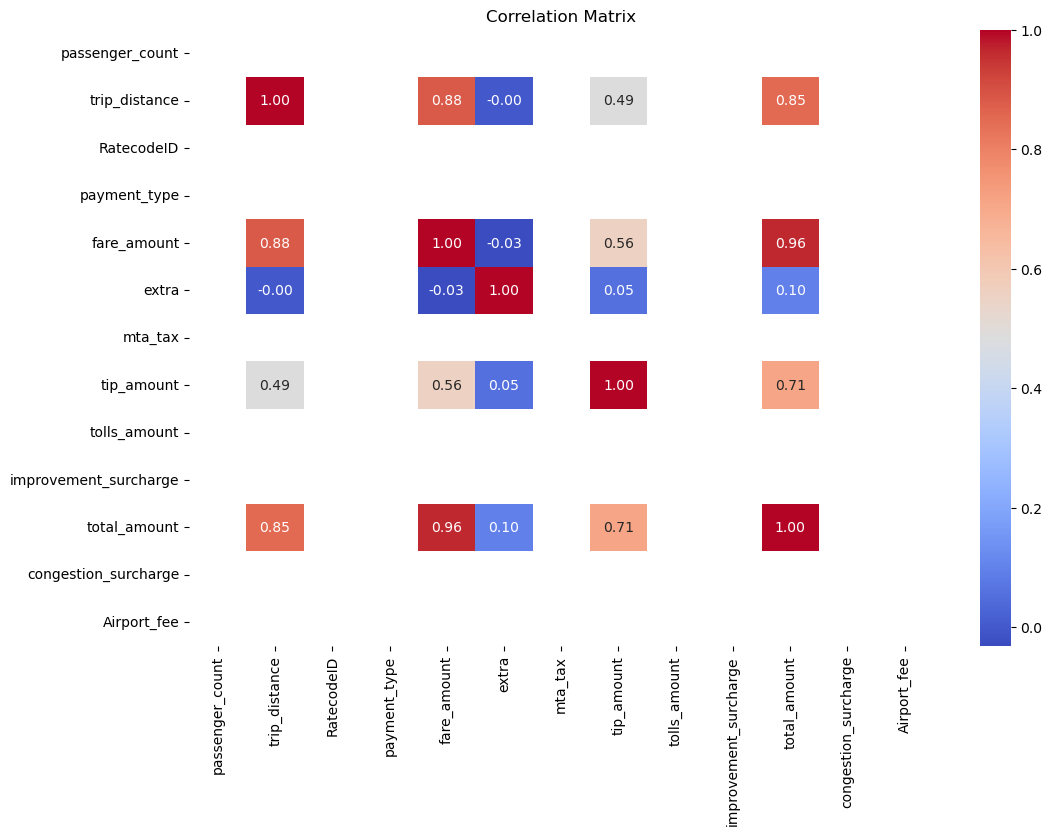

In [36]:
# 5. Correlation Analysis
numeric_df = df_no_outliers.select_dtypes(include=['int64', 'float64'])
# Compute and plot the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Highly Correlated Pairs:
       Feature 1      Feature 2  Correlation
0  trip_distance    fare_amount     0.881304
1  trip_distance   total_amount     0.853285
2    fare_amount  trip_distance     0.881304
3    fare_amount     tip_amount     0.558574
4    fare_amount   total_amount     0.964873
5     tip_amount    fare_amount     0.558574
6     tip_amount   total_amount     0.710614
7   total_amount  trip_distance     0.853285
8   total_amount    fare_amount     0.964873
9   total_amount     tip_amount     0.710614


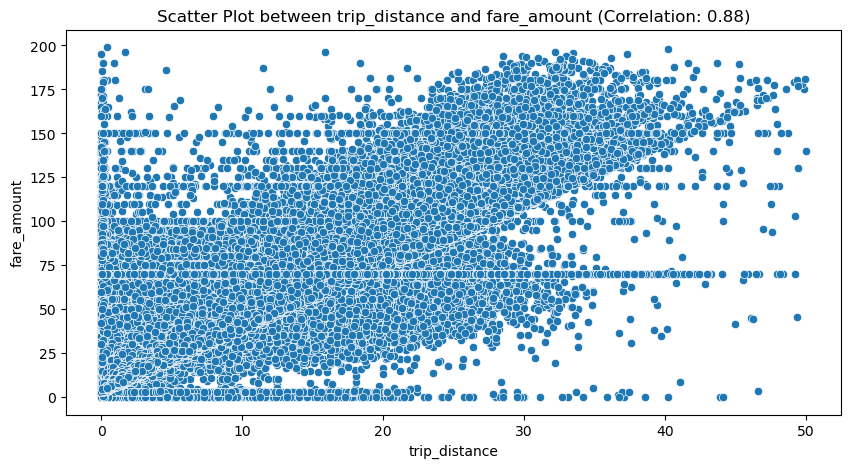

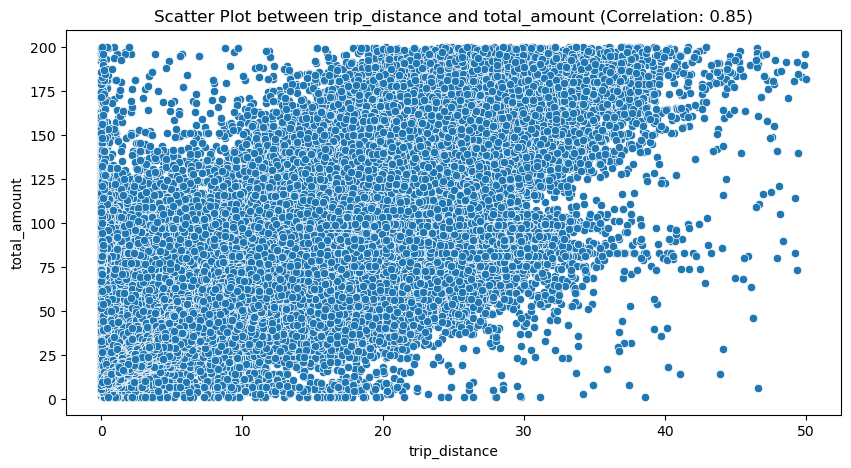

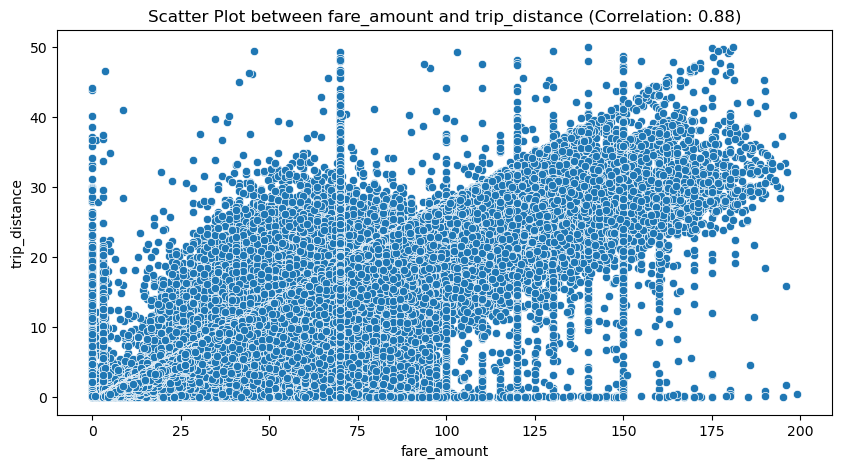

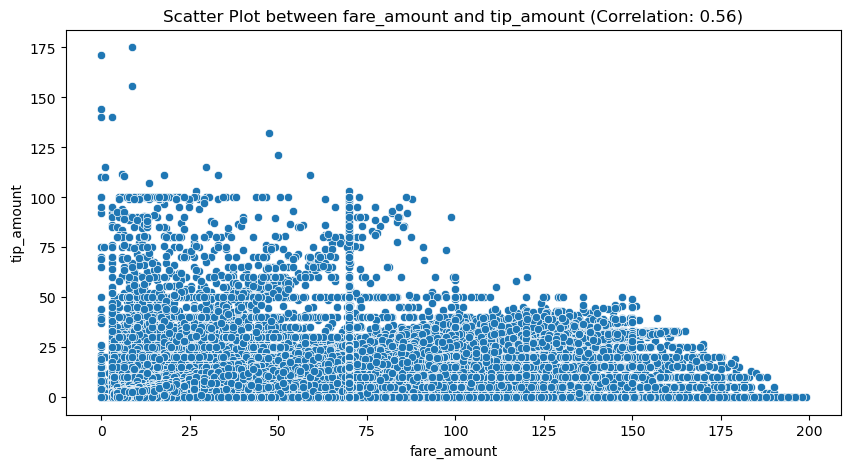

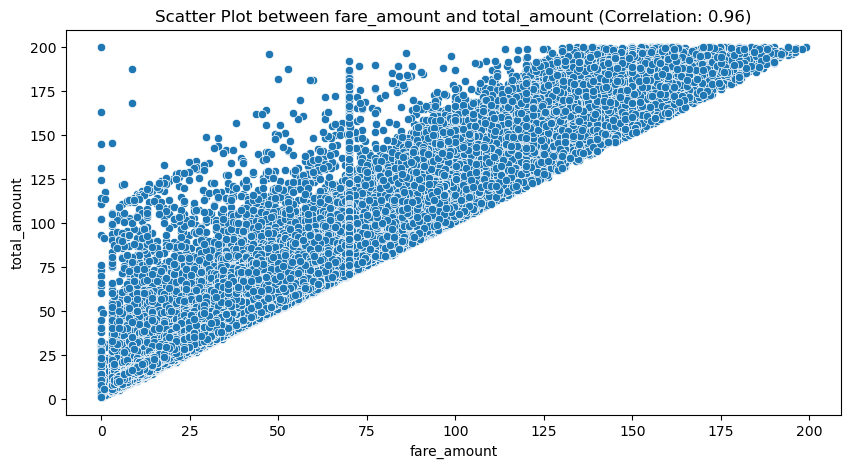

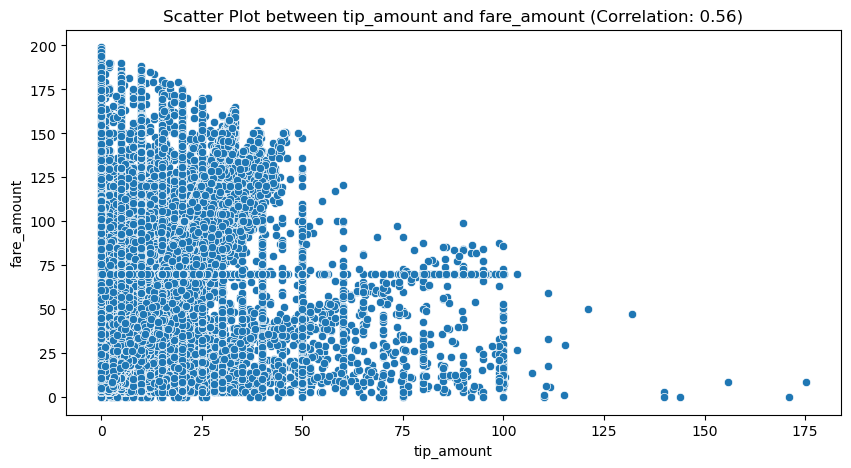

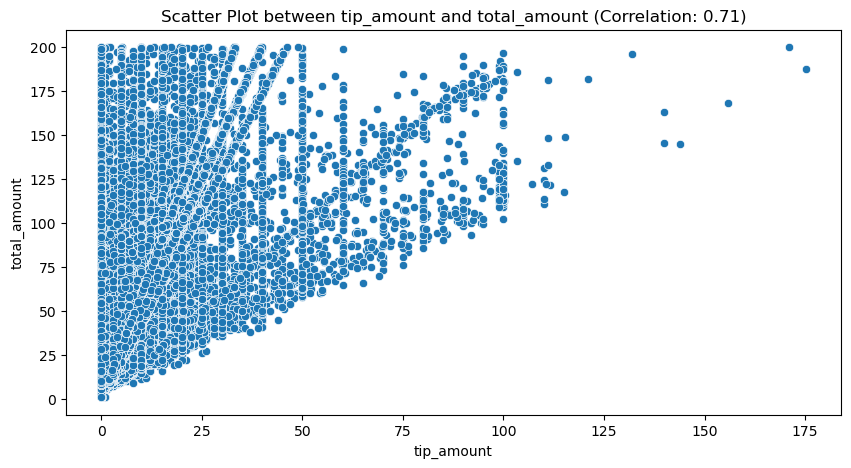

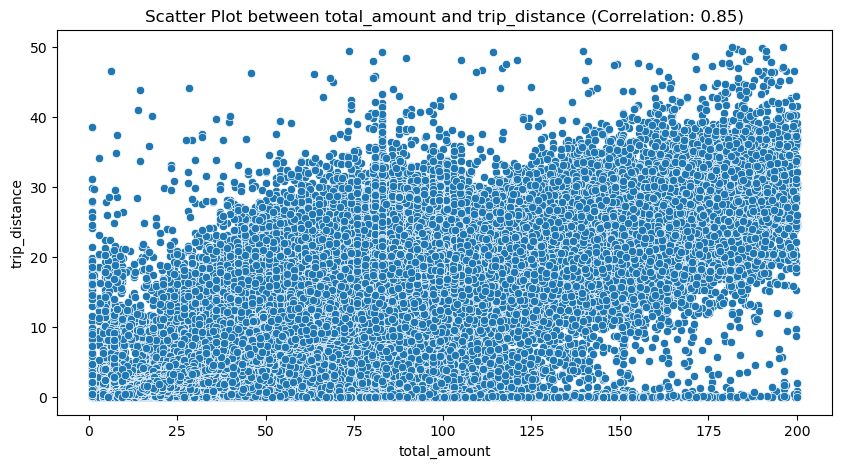

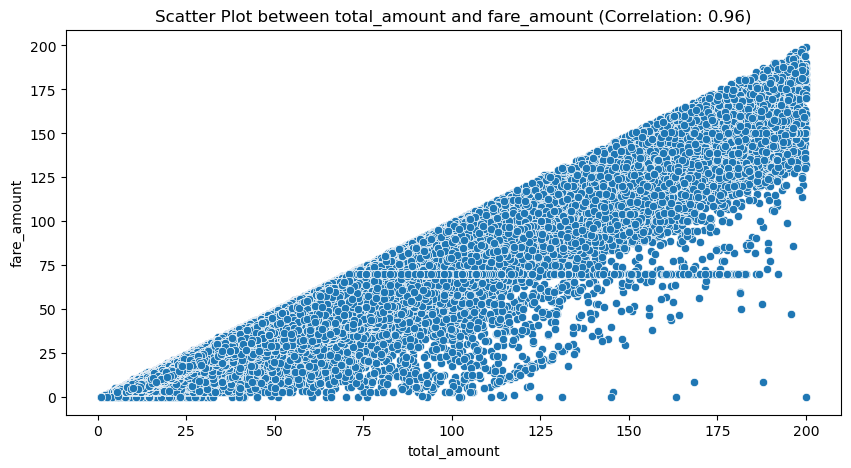

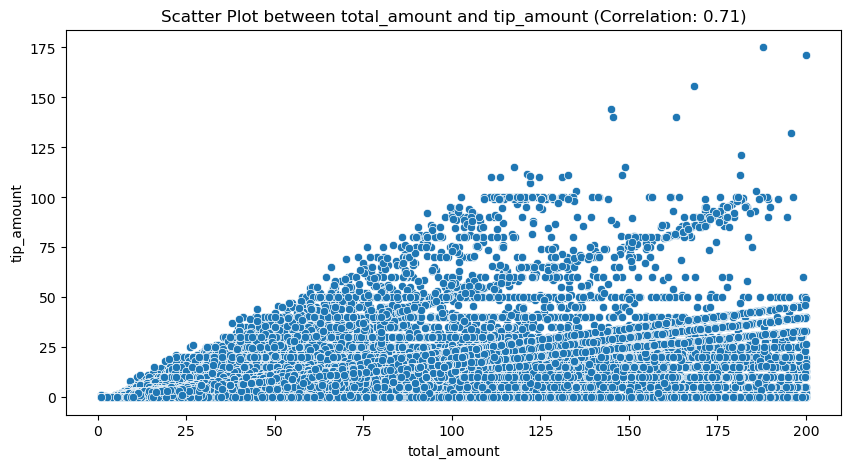

In [37]:
# 6. Scatter Plots for Highly Correlated Pairs
high_corr = corr_matrix[(corr_matrix > 0.5) & (corr_matrix < 1.0)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("\nHighly Correlated Pairs:")
print(high_corr)

for _, row in high_corr.iterrows():
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df_cleaned, x=row['Feature 1'], y=row['Feature 2'])
    plt.title(f'Scatter Plot between {row["Feature 1"]} and {row["Feature 2"]} (Correlation: {row["Correlation"]:.2f})')
    plt.xlabel(row['Feature 1'])
    plt.ylabel(row['Feature 2'])
    plt.show()

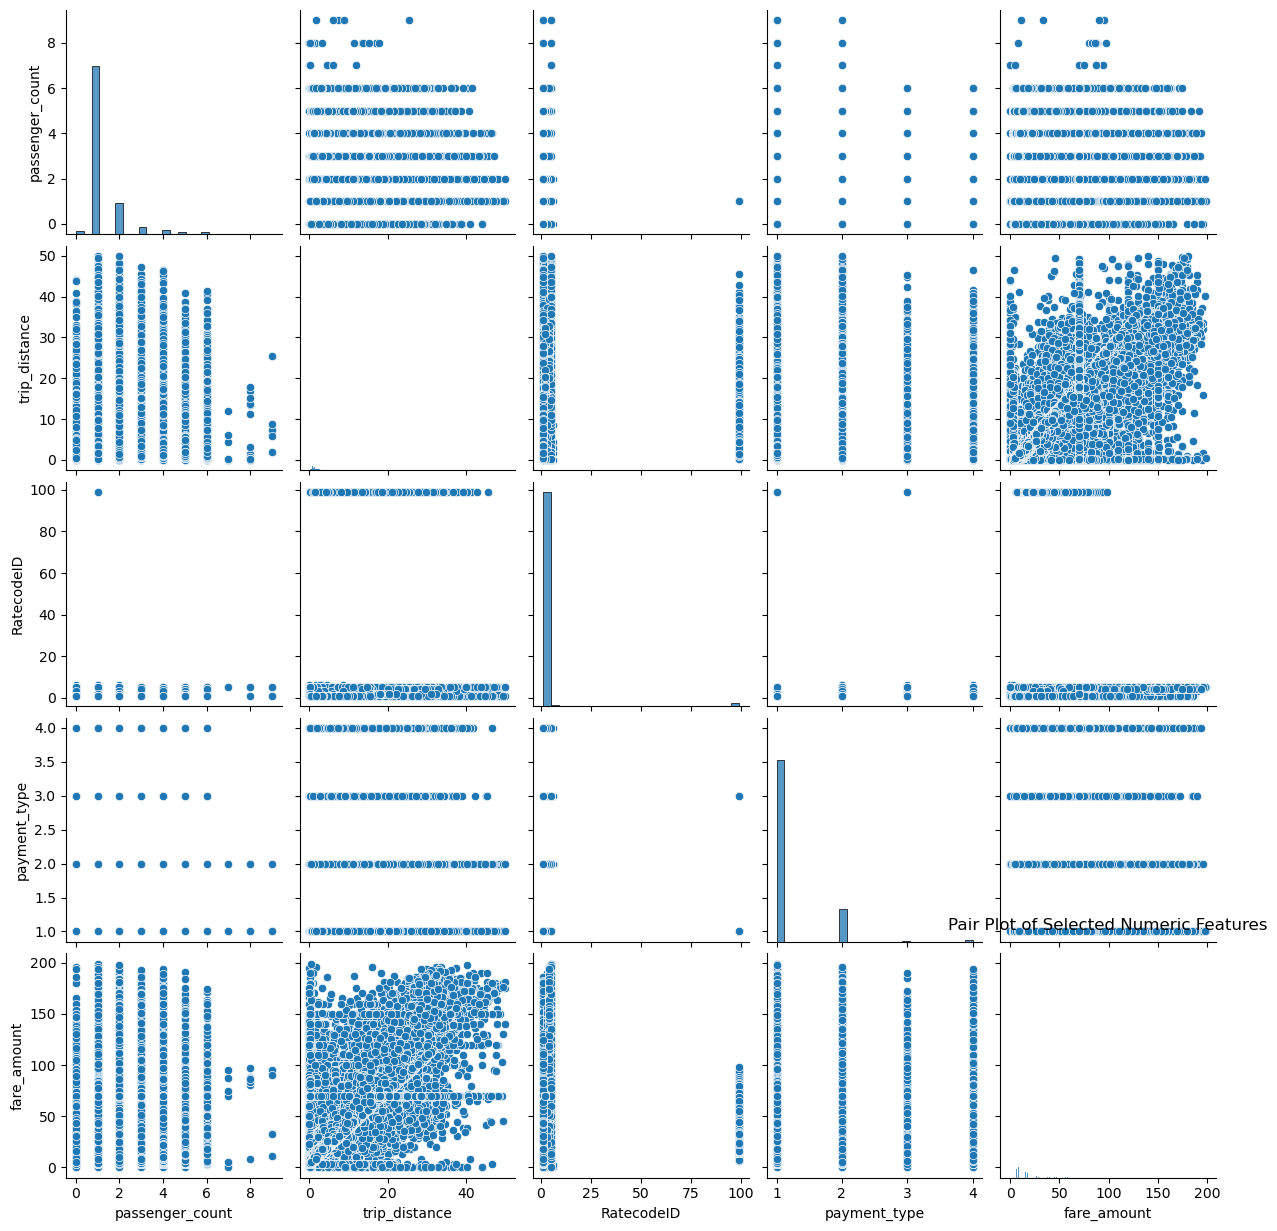

In [38]:
# 7. Pair Plot for Selected Columns
selected_columns = numeric_columns[:5]  # Select a subset for better visualization
sns.pairplot(df_cleaned[selected_columns])
plt.title("Pair Plot of Selected Numeric Features")
plt.show()

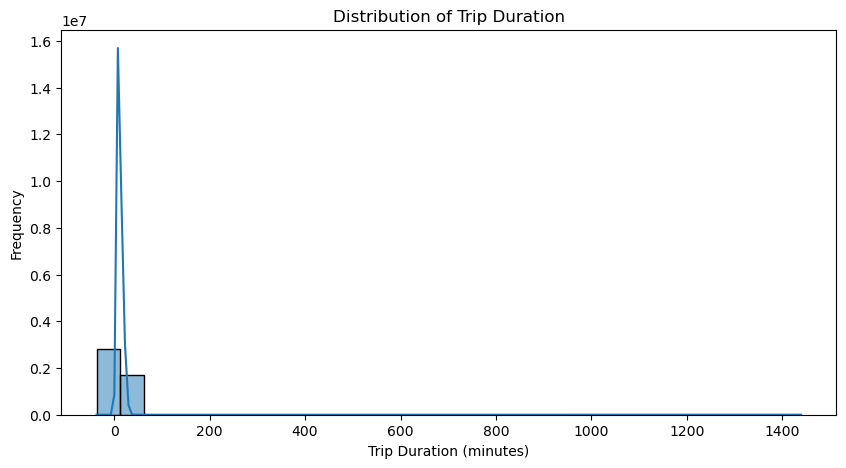

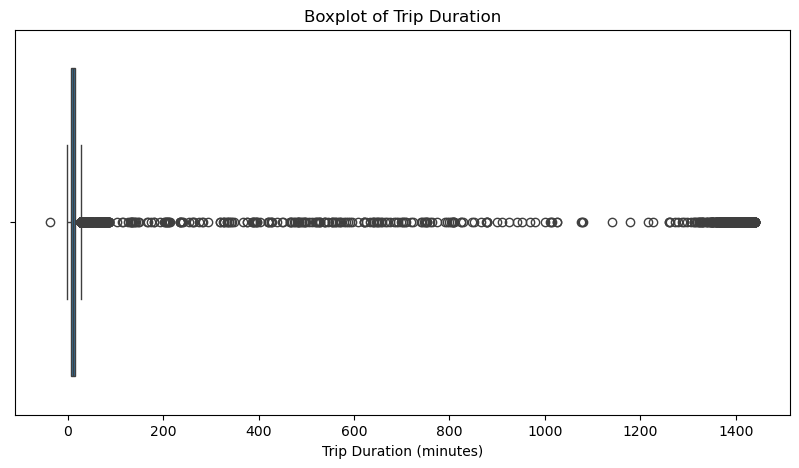

In [39]:
# 8. Distribution of Trip Duration (if applicable)
if 'tpep_pickup_datetime' in df_no_outliers.columns and 'tpep_dropoff_datetime' in df_no_outliers.columns:
    df_no_outliers['trip_duration'] = (df_no_outliers['tpep_dropoff_datetime'] - df_no_outliers['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes
    plt.figure(figsize=(10, 5))
    sns.histplot(df_no_outliers['trip_duration'], bins=30, kde=True)
    plt.title('Distribution of Trip Duration')
    plt.xlabel('Trip Duration (minutes)')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for Trip Duration
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_no_outliers, x='trip_duration')
    plt.title('Boxplot of Trip Duration')
    plt.xlabel('Trip Duration (minutes)')
    plt.show()

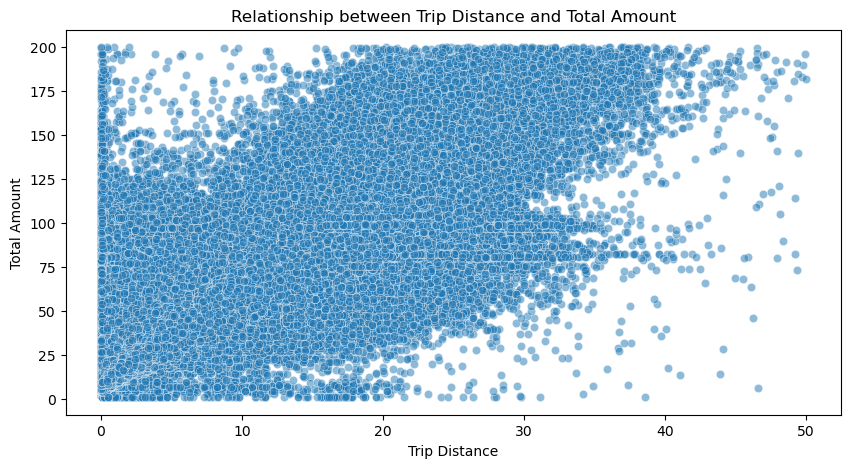

In [40]:
# 9. Relationship between Trip Distance and Total Amount
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_cleaned, x='trip_distance', y='total_amount', alpha=0.5)
plt.title('Relationship between Trip Distance and Total Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.show()


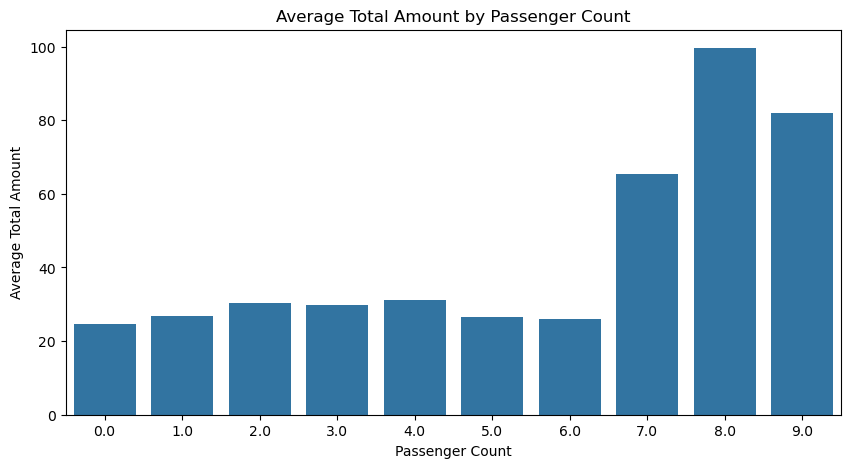

In [41]:
# 10. Average Total Amount by Passenger Count
if 'passenger_count' in df_cleaned.columns:
    avg_total_amount = df_cleaned.groupby('passenger_count')['total_amount'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(data=avg_total_amount, x='passenger_count', y='total_amount')
    plt.title('Average Total Amount by Passenger Count')
    plt.xlabel('Passenger Count')
    plt.ylabel('Average Total Amount')
    plt.show()

1. Distribution of Numeric Columns
Identify numeric columns (int64 and float64) in the dataset.
Plot histograms with kernel density estimation (KDE) to visualize the distribution of each numeric column.
Label the axes and include descriptive titles for better understanding.
2. Boxplots for Outlier Detection
Generate boxplots for all numeric columns to identify potential outliers.
Boxplots provide a summary of the data's central tendency, spread, and potential outliers visually.
3. Count Plot for Categorical Columns
Identify categorical columns (object dtype) in the dataset.
Plot count plots for each categorical column to visualize the frequency of unique categories.
Rotate x-axis labels (if necessary) for better readability.
4. Time Series Analysis for Date Columns
Identify date columns (datetime64 dtype) in the dataset.
Extract time-based features like month, day, and hour for more detailed analysis.
Plot distributions for these extracted time-based features to understand patterns over time.
5. Correlation Analysis
Extract numeric columns to compute the correlation matrix.
Use a heatmap to visualize the correlation matrix with annotations for clarity.
Highlights relationships between numeric variables.
6. Pair Plot for Selected Columns
Select the first 5 numeric columns for visualization (subset to avoid overcrowding).
Create pair plots to explore relationships and distributions across multiple numeric columns simultaneously.
7. Distribution of Trip Duration
Check for specific columns (tpep_pickup_datetime, tpep_dropoff_datetime) to calculate trip duration.
Compute trip duration in minutes and plot its distribution using a histogram with KDE.
Create a boxplot to visualize the spread and detect potential outliers in trip duration.
8. Relationship between Trip Distance and Total Amount
Plot a scatterplot to analyze the relationship between trip distance and total fare amount.
Include transparency (alpha=0.5) to handle overlapping points.
9. Average Total Amount by Passenger Count
If passenger_count exists, calculate the average total fare amount grouped by passenger count.
Plot a bar chart to visualize how the average fare varies with the number of passengers.

# Feature Engineerig 

1. Trip Duration (in minutes)
If both tpep_pickup_datetime and tpep_dropoff_datetime columns exist:
Calculate trip duration in minutes by finding the difference between drop-off and pickup times in seconds, then dividing by 60.
2. Speed Estimate (in miles per hour)
If trip_duration and trip_distance columns exist:
Compute average speed by dividing the trip distance by the trip duration in hours.
Use np.where to handle cases where trip duration is zero, setting speed to 0 to avoid division by zero errors.
3. Fare per Mile and Tip Percentage
Fare per Mile:
If total_amount and trip_distance columns exist:
Calculate fare per mile by dividing the total fare amount by the trip distance.
Use np.where to handle cases where the trip distance is zero, setting fare per mile to 0.
Tip Percentage:
If tip_amount and total_amount columns exist:
Compute tip percentage as (tip_amount / total_amount) * 100.
Use np.where to handle cases where total fare is zero, setting tip percentage to 0.
4. Rush Hour Flag
Define a rush hour flag based on pickup_hour:
Set the flag to 1 if the hour is between 7-9 AM or 4-6 PM.
Otherwise, set the flag to 0.
5. High Fare Flag
If the total_amount column exists:
Create a flag for high fares by setting it to 1 if the total fare amount is greater than $50.
Otherwise, set the flag to 0.
6. Passenger Count Flag
If the passenger_count column exists:
Create a flag is_single_passenger to distinguish between single and group travel.
Set the flag to 1 if the passenger count is 1.
Otherwise, set the flag to 0.

In [43]:
import pandas as pd
import numpy as np

In [44]:
# Assuming 'df' has datetime columns like 'tpep_pickup_datetime' and 'tpep_dropoff_datetime'

# 1. Extract Date Components
# If pickup and dropoff datetime columns are available
if 'tpep_pickup_datetime' in df.columns:
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
    df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
    df['pickup_weekend'] = df['pickup_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Flag for weekend

if 'tpep_dropoff_datetime' in df.columns:
    df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
    df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day
    df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month
    df['dropoff_day_of_week'] = df['tpep_dropoff_datetime'].dt.dayofweek

In [45]:
# 2. Trip Duration (in minutes)
if 'tpep_pickup_datetime' in df.columns and 'tpep_dropoff_datetime' in df.columns:
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# 3. Speed Estimate (in miles per hour)
# Calculate only if 'trip_duration' and 'trip_distance' exist
if 'trip_duration' in df.columns and 'trip_distance' in df.columns:
    df['average_speed'] = np.where(df['trip_duration'] > 0, df['trip_distance'] / (df['trip_duration'] / 60), 0)

# 4. Fare per Mile and Tip Percentage (if applicable)
if 'total_amount' in df.columns and 'trip_distance' in df.columns:
    df['fare_per_mile'] = np.where(df['trip_distance'] > 0, df['total_amount'] / df['trip_distance'], 0)

if 'tip_amount' in df.columns and 'total_amount' in df.columns:
    df['tip_percentage'] = np.where(df['total_amount'] > 0, (df['tip_amount'] / df['total_amount']) * 100, 0)

# 5. Rush Hour Flag (e.g., 7-9 AM and 4-6 PM as rush hours)
df['rush_hour'] = df['pickup_hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 18 else 0)

# 6. High Fare Flag (e.g., fare > $50 as a high fare)
if 'total_amount' in df.columns:
    df['high_fare'] = df['total_amount'].apply(lambda x: 1 if x > 50 else 0)

# 7. Passenger Count Flag (e.g., single vs group travel)
if 'passenger_count' in df.columns:
    df['is_single_passenger'] = df['passenger_count'].apply(lambda x: 1 if x == 1 else 0)

In [46]:
# Display the updated DataFrame with new features
print("Feature-engineered DataFrame:")
df.head()

Feature-engineered DataFrame:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-02-01 00:04:45   2024-02-01 00:19:58              1.0   
1         2  2024-02-01 00:56:31   2024-02-01 01:10:53              1.0   
2         2  2024-02-01 00:07:50   2024-02-01 00:43:12              2.0   
3         1  2024-02-01 00:01:49   2024-02-01 00:10:47              1.0   
4         1  2024-02-01 00:37:35   2024-02-01 00:51:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.39         1.0                  N            68           236   
1           7.71         1.0                  N            48           243   
2          28.69         2.0                  N           132           261   
3           1.10         1.0                  N           161           163   
4           2.60         1.0                  N           246            79   

   payment_type  ...  dropoff_day  dropoff_month  dropoff_day_of_week  \
0             1  ...            1              2                    3   
1             1  ...            1              2                    3   
2             2  ...            1              2                    3   
3             1  ...            1              2                    3   
4             2  ...            1              2                    3   

   trip_duration  average_speed  fare_per_mile  tip_percentage  rush_hour  \
0      15.216667      17.309967       6.100228        4.779686          0   
1      14.366667      32.199536       5.836576       20.000000          0   
2      35.366667      48.672950       2.882189        0.000000          0   
3       8.966667       7.360595      15.590909       16.618076          0   
4      13.666667      11.414634       7.923077        0.000000          0   

   high_fare  is_single_passenger  
0          0                    1  
1          0                    1  
2          1                    0  
3          0                    1  
4          0                    1  

[5 rows x 35 columns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554778 entries, 0 to 9554777
Data columns (total 35 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

Explanation of the New Features

Date Components:

    pickup_hour: Hour of pickup time.

    pickup_day, pickup_month, pickup_day_of_week: Day, month, and day of the week of pickup.

    pickup_weekend: Binary feature indicating whether the trip was on a weekend.

Trip Duration: Duration in minutes between pickup and dropoff.

Average Speed: Estimated average speed (distance divided by time).

Fare per Mile: Total fare divided by trip distance to capture cost efficiency.

Tip Percentage: Percentage of the tip relative to the total fare.

Rush Hour Flag: Binary flag for trips during rush hour times.

High Fare Flag: Binary flag for trips with high fares (e.g., over $50).

Single Passenger Flag: Binary flag for single-passenger trips.

# Data Transformations

The transformations applied are:

1. Log Transformation: Applied to skewed numeric columns.

2. Standardization: Applied to numeric columns with potentially different scales.

3. Min-Max Normalization: Also applied to numeric columns.

4. Encoding Categorical Variables: Converting categorical columns to numeric format where applicable.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

1. Selection of Relevant Columns
The numeric_columns list includes numeric features likely to be skewed:
Examples include trip_distance, fare_amount, total_amount, tip_amount, tolls_amount, and other derived metrics.
These columns are candidates for transformations to reduce skewness and stabilize variance.
2. Plotting Histograms Before Transformation
For each numeric column:
A histogram is plotted using sns.histplot to visualize the distribution before applying the log transformation.
Includes KDE (Kernel Density Estimation) to understand the shape of the distribution.
3. Log Transformation
Apply the natural log transformation using np.log1p, which calculates log(1 + x):
The 1 ensures non-negative values for columns that may contain zero.
Create new columns prefixed with log_ for the transformed values.
4. Plotting Histograms After Transformation
For each transformed column:
Plot a histogram to visualize the distribution after applying the log transformation.
Compare with the original histograms to observe the reduction in skewness.
Why Log Transformation?
Helps in normalizing distributions that are heavily right-skewed.
Stabilizes variance and reduces the influence of extreme values.
Improves the performance and accuracy of machine learning models by making data more Gaussian-like.
Visual Insights:
Histograms before and after log transformation help evaluate the effectiveness of the transformation in reducing skewness.
The log1p function ensures transformations are valid for zero and near-zero values, maintaining data integrity.

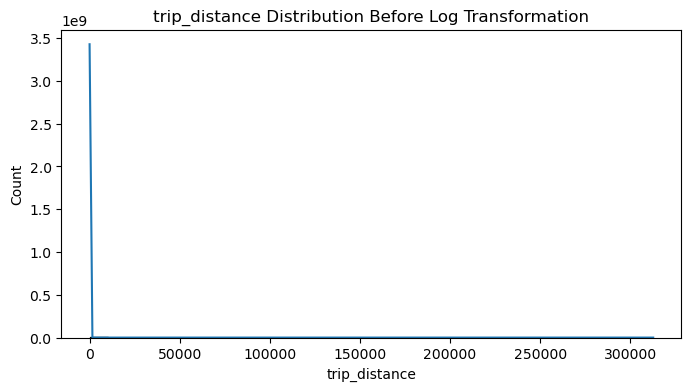

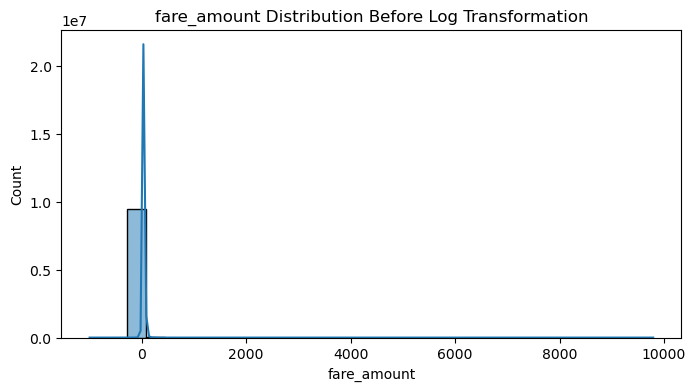

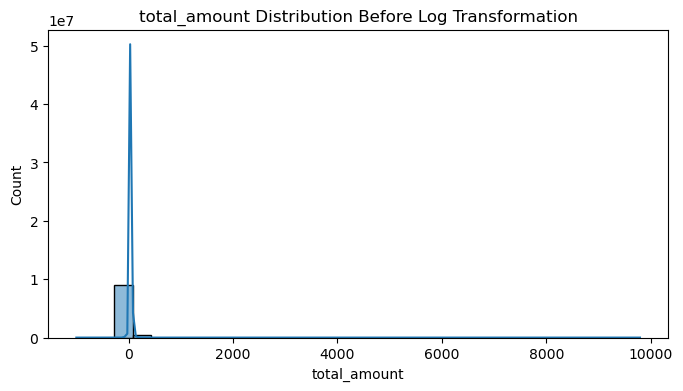

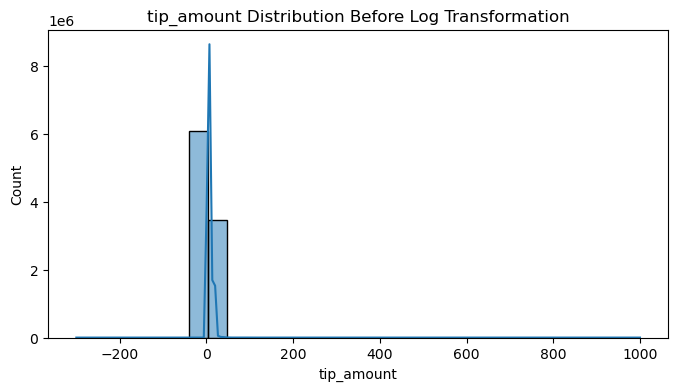

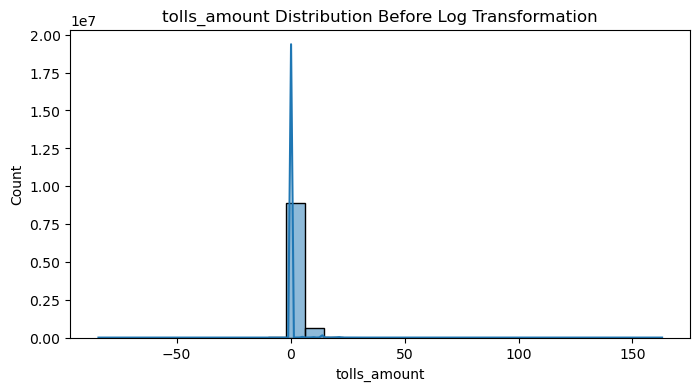

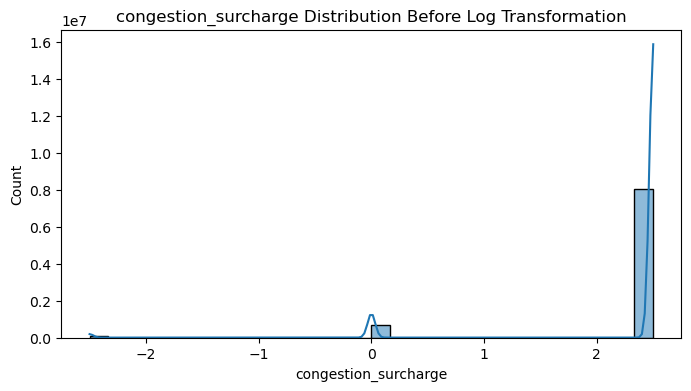

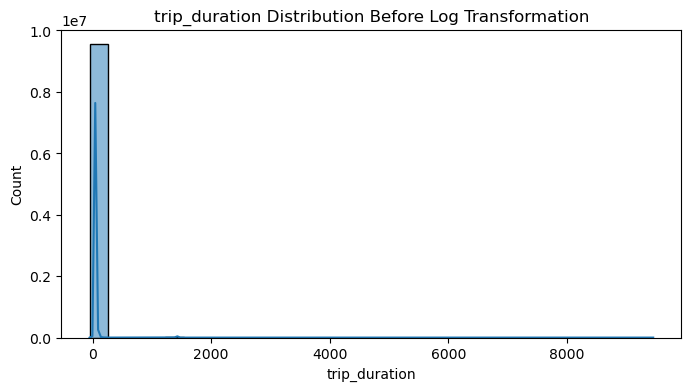

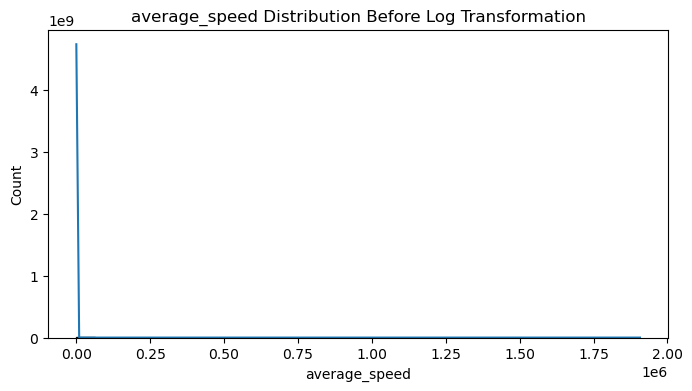

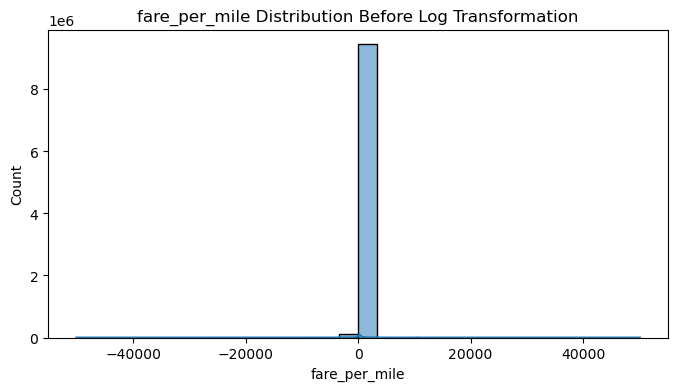

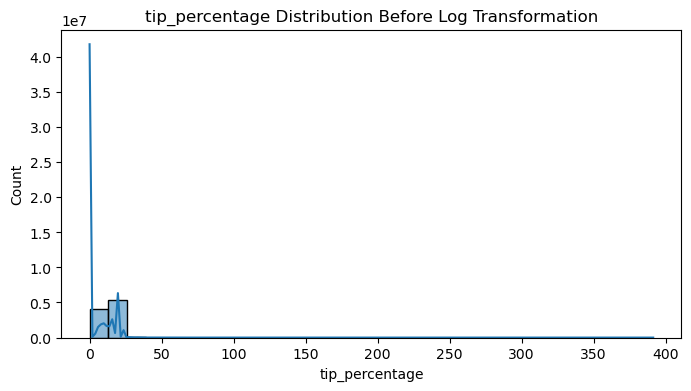

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value enc

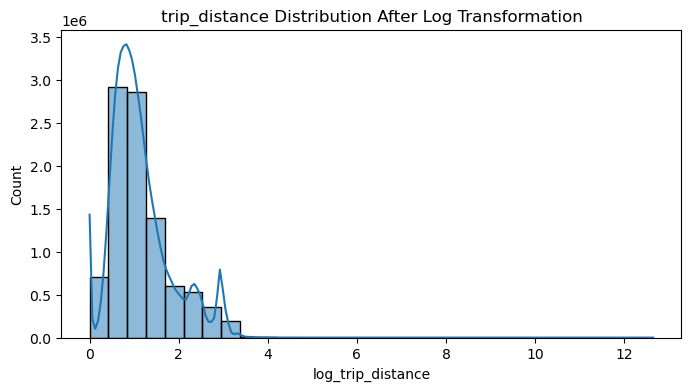

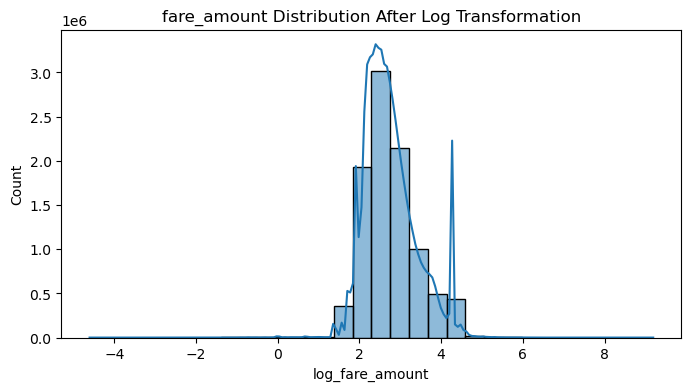

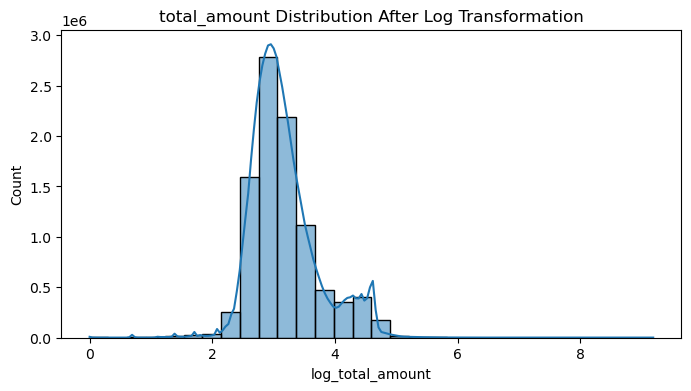

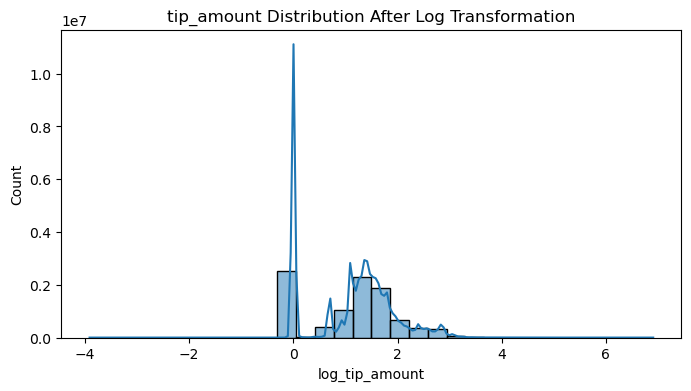

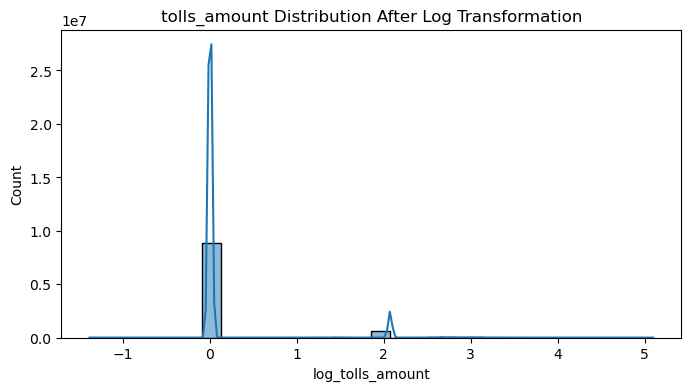

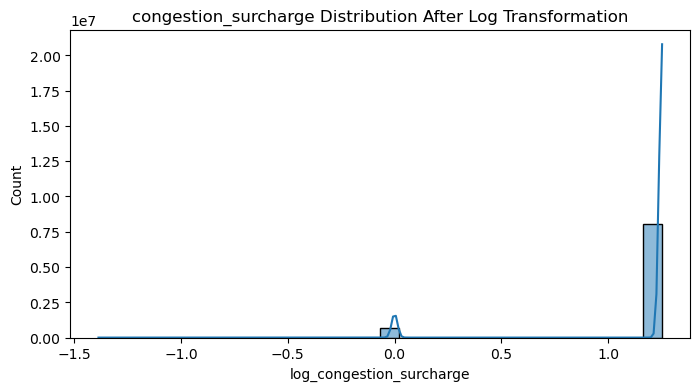

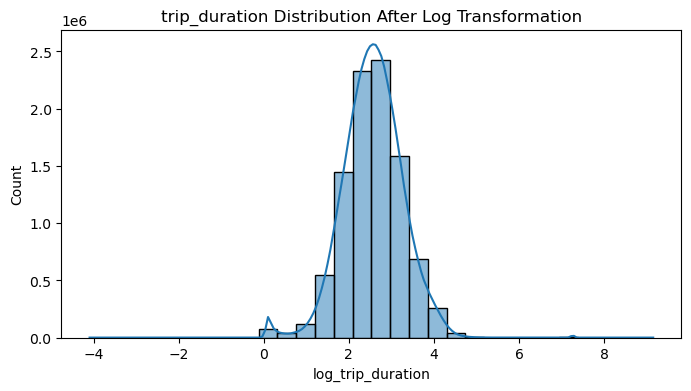

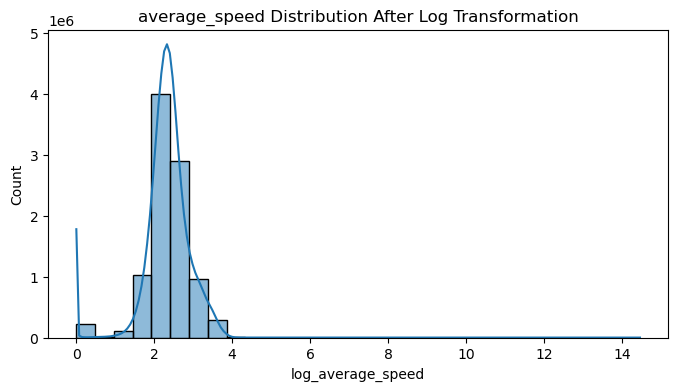

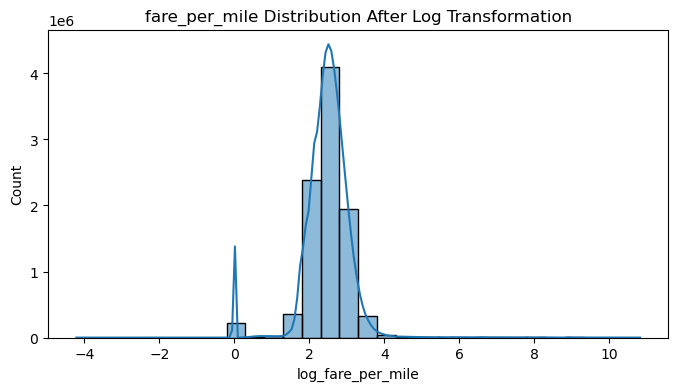

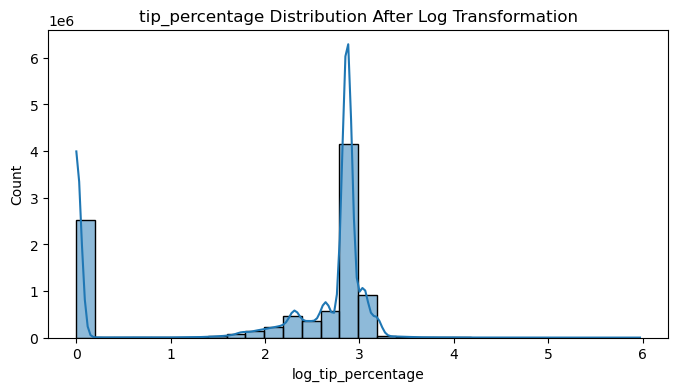

In [52]:
# Selecting relevant columns for transformations
# Assuming 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount' are likely skewed and need transformations
numeric_columns = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 
                   'congestion_surcharge', 'trip_duration', 'average_speed', 'fare_per_mile', 'tip_percentage']

# 1. Log Transformation (for skewed columns)
# Plotting histograms before log transformation
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} Distribution Before Log Transformation')
    plt.xlabel(col)
    plt.show()

# Applying log transformation and creating new columns
for col in numeric_columns:
    df[f'log_{col}'] = np.log1p(df[col])  # log1p to handle zero values

# Plotting histograms after log transformation
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[f'log_{col}'], bins=30, kde=True)
    plt.title(f'{col} Distribution After Log Transformation')
    plt.xlabel(f'log_{col}')
    plt.show()

1. Standardization Using Z-Score
Purpose:
Scale the numeric features to ensure they have a standard normal distribution.
Standardization ensures each feature contributes equally to distance-based algorithms like k-means or SVM.
Implementation:
Use StandardScaler() from sklearn.preprocessing.
Fit the scaler to the numeric_columns data and transform it to standardized values.
2. Creating New Standardized Columns
New columns are created for the standardized values:
Column names are prefixed with standardized_ for clarity and separation from original data.
Example: trip_distance becomes standardized_trip_distance.
3. Plotting Distributions After Standardization
For each standardized column:
Plot a histogram to visualize the distribution using sns.histplot.
KDE is included to show the shape of the standardized data distribution.
Titles and axis labels are updated to reflect the standardized columns.

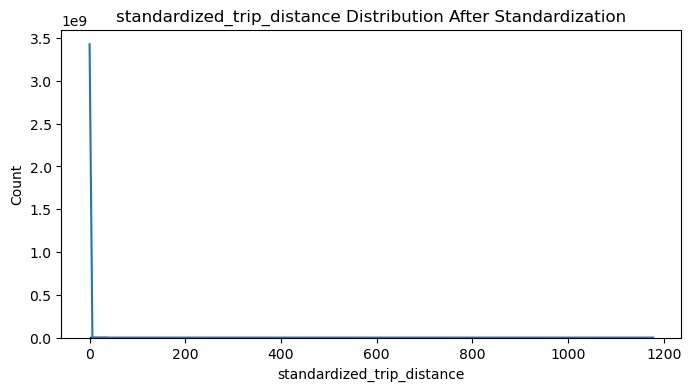

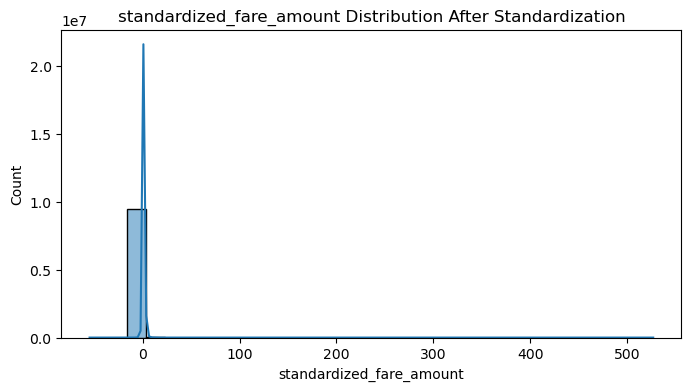

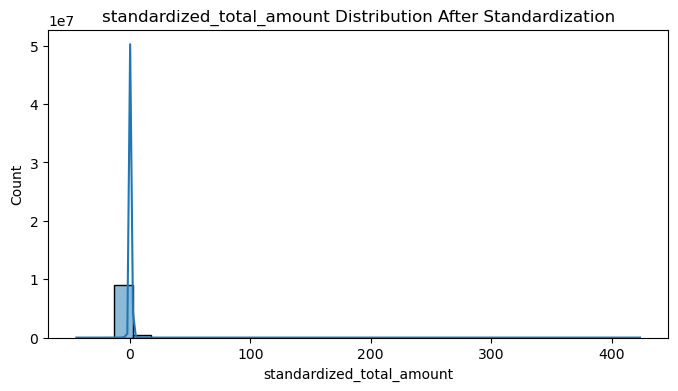

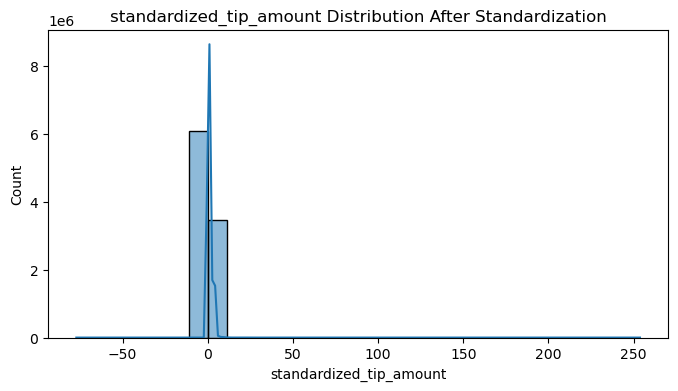

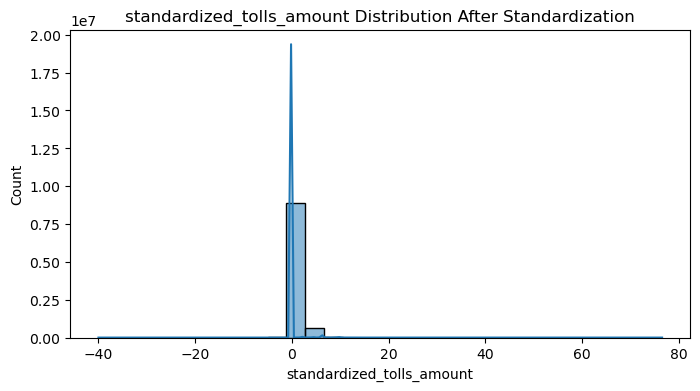

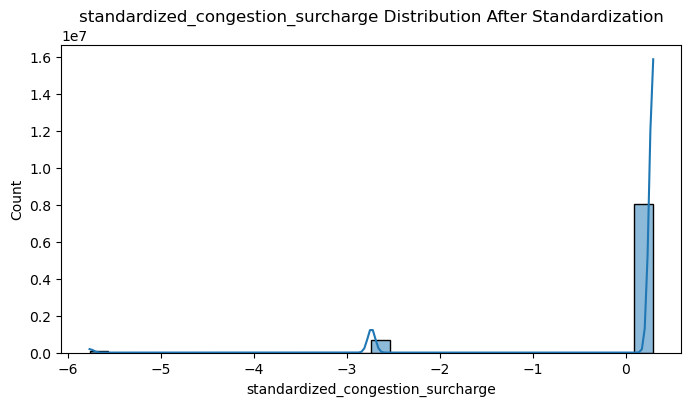

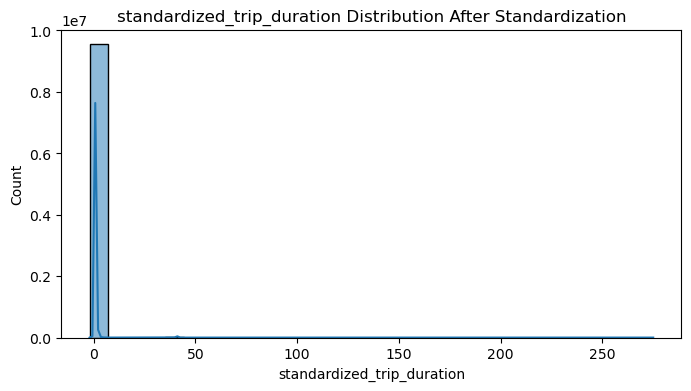

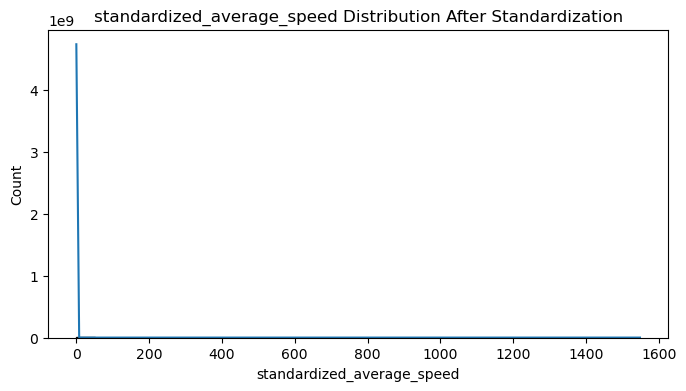

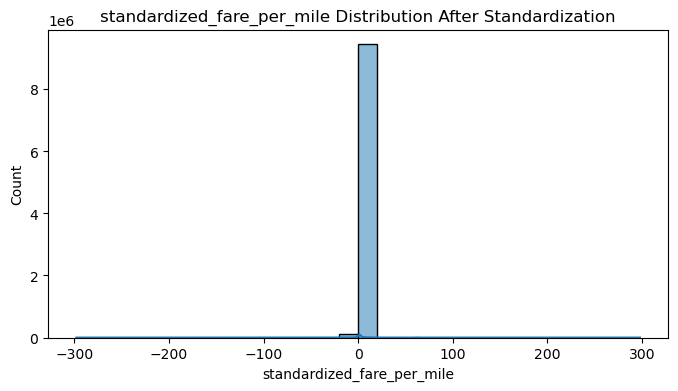

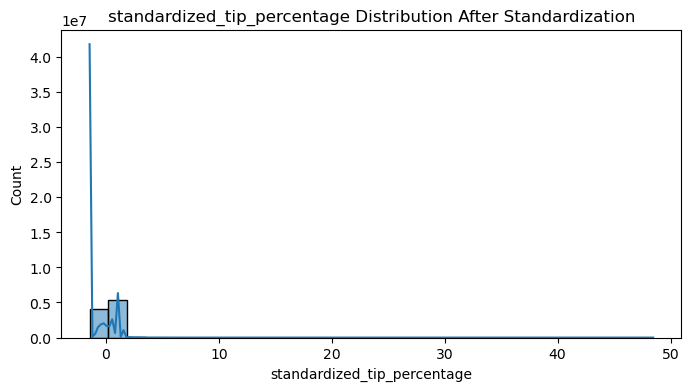

In [53]:
# 2. Standardization (Z-score normalization)
scaler = StandardScaler()
standardized_cols = [f'standardized_{col}' for col in numeric_columns]
df[standardized_cols] = scaler.fit_transform(df[numeric_columns])

# Plotting distributions after standardization
for col in standardized_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} Distribution After Standardization')
    plt.xlabel(col)
    plt.show()

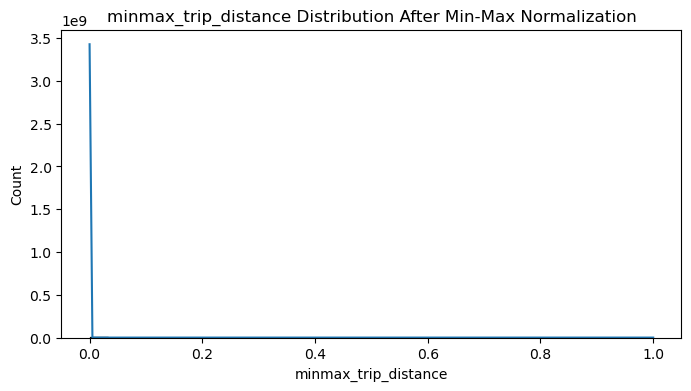

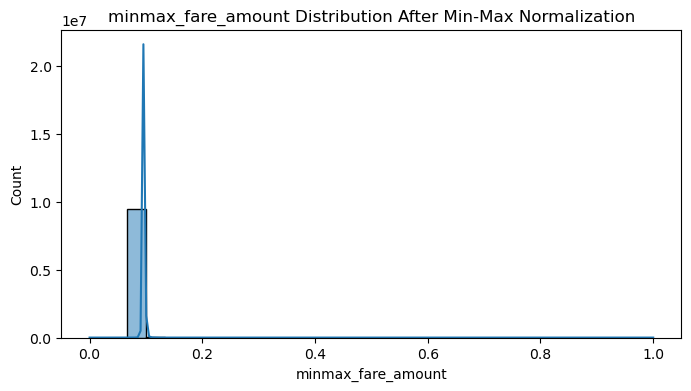

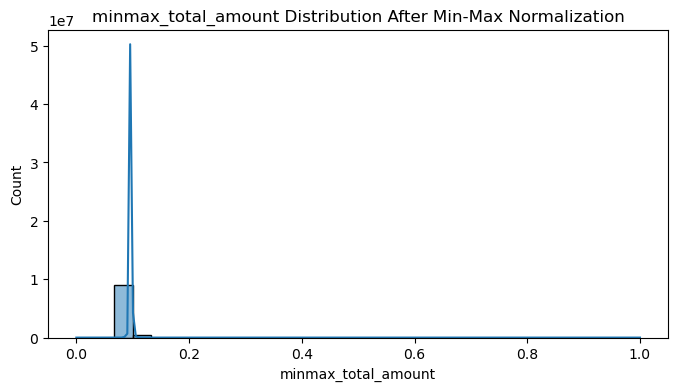

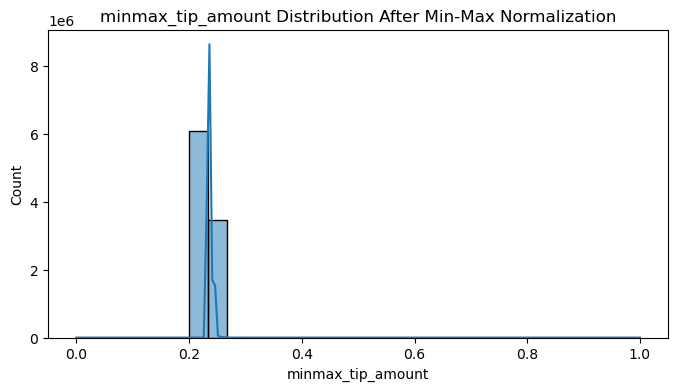

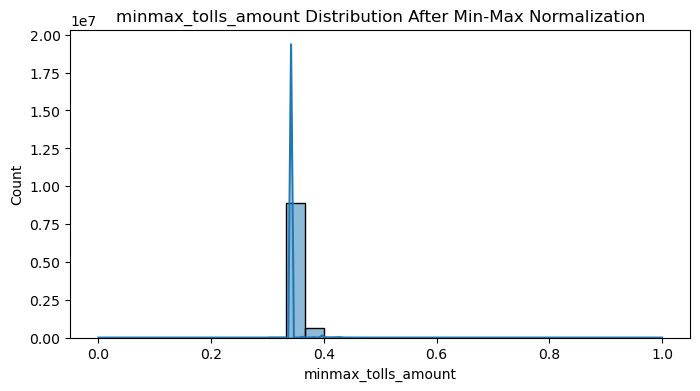

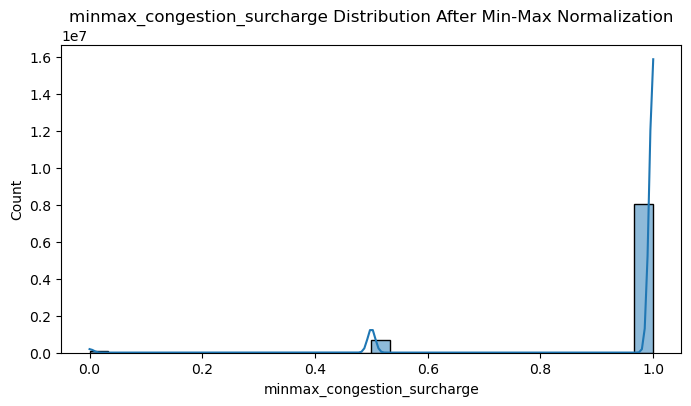

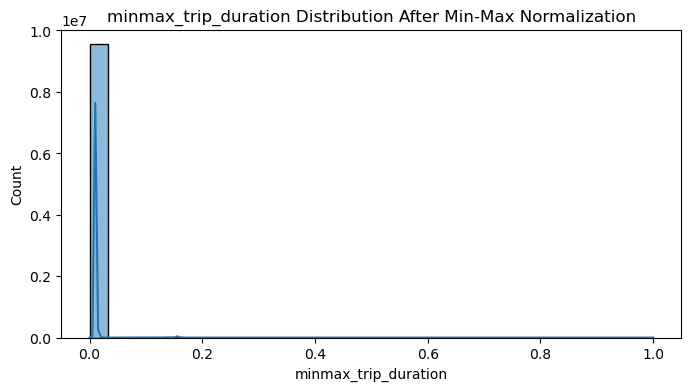

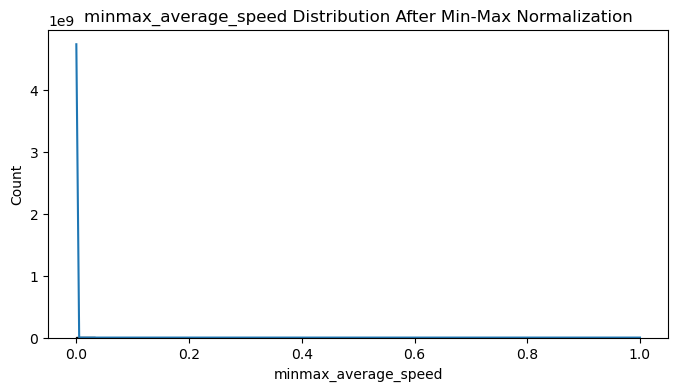

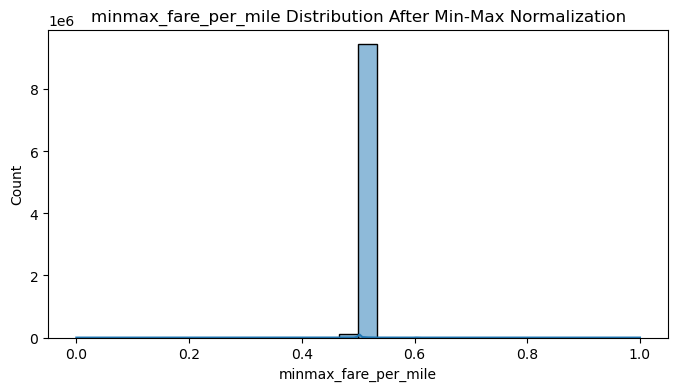

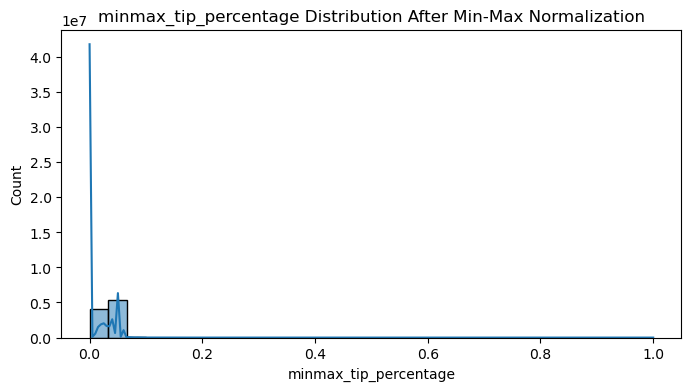

In [55]:
# 3. Min-Max Normalization
minmax_scaler = MinMaxScaler()
minmax_cols = [f'minmax_{col}' for col in numeric_columns]
df[minmax_cols] = minmax_scaler.fit_transform(df[numeric_columns])

# Plotting distributions after Min-Max normalization
for col in minmax_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} Distribution After Min-Max Normalization')
    plt.xlabel(col)
    plt.show()

Identifying Categorical Columns

The code assumes the dataset contains a single categorical column: 'store_and_fwd_flag'.
Displaying Unique Values

Before encoding, the unique values in the column are displayed using df['store_and_fwd_flag'].unique() to:
Understand the distinct categories.
Ensure the column is appropriate for encoding.
Applying One-Hot Encoding

Use pd.get_dummies() to create binary columns for each category in 'store_and_fwd_flag'.
The drop_first=True parameter:
Reduces redundancy by dropping one of the dummy variables (to avoid multicollinearity).
Encodes only n-1 columns for n unique categories, ensuring the last category is inferred.
Dataset After Encoding

The original column ('store_and_fwd_flag') is replaced with the new one-hot encoded columns.
Example:
If 'store_and_fwd_flag' has values ['N', 'Y'], it will generate one column: 'store_and_fwd_flag_Y'.
A value of 'N' will be encoded as 0, and 'Y' will be encoded as 1.


In [56]:
# 4. Categorical Encoding (One-Hot Encoding for categorical columns)
# Only one categorical column ('store_and_fwd_flag') in the provided data

# Before encoding - displaying unique values
print("Unique values in 'store_and_fwd_flag' before encoding:")
print(df['store_and_fwd_flag'].unique())

# One-hot encoding
df = pd.get_dummies(df, columns=['store_and_fwd_flag'], drop_first=True)

Unique values in 'store_and_fwd_flag' before encoding:
['N' 'Y' None]


In [57]:
# Displaying a sample of the transformed DataFrame
print("\nTransformed DataFrame sample after encoding:")
df.head()


Transformed DataFrame sample after encoding:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-02-01 00:04:45   2024-02-01 00:19:58              1.0   
1         2  2024-02-01 00:56:31   2024-02-01 01:10:53              1.0   
2         2  2024-02-01 00:07:50   2024-02-01 00:43:12              2.0   
3         1  2024-02-01 00:01:49   2024-02-01 00:10:47              1.0   
4         1  2024-02-01 00:37:35   2024-02-01 00:51:15              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           4.39         1.0            68           236             1   
1           7.71         1.0            48           243             1   
2          28.69         2.0           132           261             2   
3           1.10         1.0           161           163             1   
4           2.60         1.0           246            79             2   

   fare_amount  ...  minmax_fare_amount  minmax_total_amount  \
0         20.5  ...            0.094477             0.095143   
1         31.0  ...            0.095450             0.096831   
2         70.0  ...            0.099064             0.100323   
3          9.3  ...            0.093439             0.094250   
4         15.6  ...            0.094023             0.094570   

   minmax_tip_amount  minmax_tolls_amount  minmax_congestion_surcharge  \
0           0.231756             0.340882                          1.0   
1           0.237694             0.340882                          1.0   
2           0.230771             0.368945                          1.0   
3           0.232963             0.340882                          1.0   
4           0.230771             0.340882                          1.0   

   minmax_trip_duration  minmax_average_speed  minmax_fare_per_mile  \
0              0.007077              0.000009              0.500061   
1              0.006987              0.000017              0.500058   
2              0.009196              0.000026              0.500029   
3              0.006420              0.000004              0.500156   
4              0.006914              0.000006              0.500079   

   minmax_tip_percentage  store_and_fwd_flag_Y  
0               0.012215                 False  
1               0.051111                 False  
2               0.000000                 False  
3               0.042468                 False  
4               0.000000                 False  

[5 rows x 65 columns]

In [58]:
df.to_csv('df_trans.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554778 entries, 0 to 9554777
Data columns (total 65 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   VendorID                           int32         
 1   tpep_pickup_datetime               datetime64[us]
 2   tpep_dropoff_datetime              datetime64[us]
 3   passenger_count                    float64       
 4   trip_distance                      float64       
 5   RatecodeID                         float64       
 6   PULocationID                       int32         
 7   DOLocationID                       int32         
 8   payment_type                       int64         
 9   fare_amount                        float64       
 10  extra                              float64       
 11  mta_tax                            float64       
 12  tip_amount                         float64       
 13  tolls_amount                       float64       
 14  im

# Dimensionality Reduction

Steps

1. Standardize the Data: Standardization is essential for PCA to ensure that each feature contributes equally.

2. Apply PCA: Perform PCA to extract the principal components.

3. Scree Plot: Plot the explained variance ratio for each principal component to visualize the amount of variance captured by each.

4. PCA Components: Display the transformed values for each column

In [62]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [63]:
# Selecting only numeric columns for PCA
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
df_numeric = df[numeric_columns]
# Replace infinity values with NaN
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)
df_numeric = df_numeric.dropna()
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [64]:
# Applying PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

Descending Trend:

The first few components capture most of the variance (e.g., the first component explains about 25% of the variance).
Subsequent components contribute progressively less variance, which is why the curve flattens.
Elbow Point:

The "elbow" in the curve (where the rate of decline slows significantly) indicates the optimal number of components to retain.
Beyond this point, additional components contribute very little variance and might not be worth retaining for dimensionality reduction.
Dimensionality Reduction:

Retaining only the components before the elbow can simplify the dataset while preserving most of the variance.`m

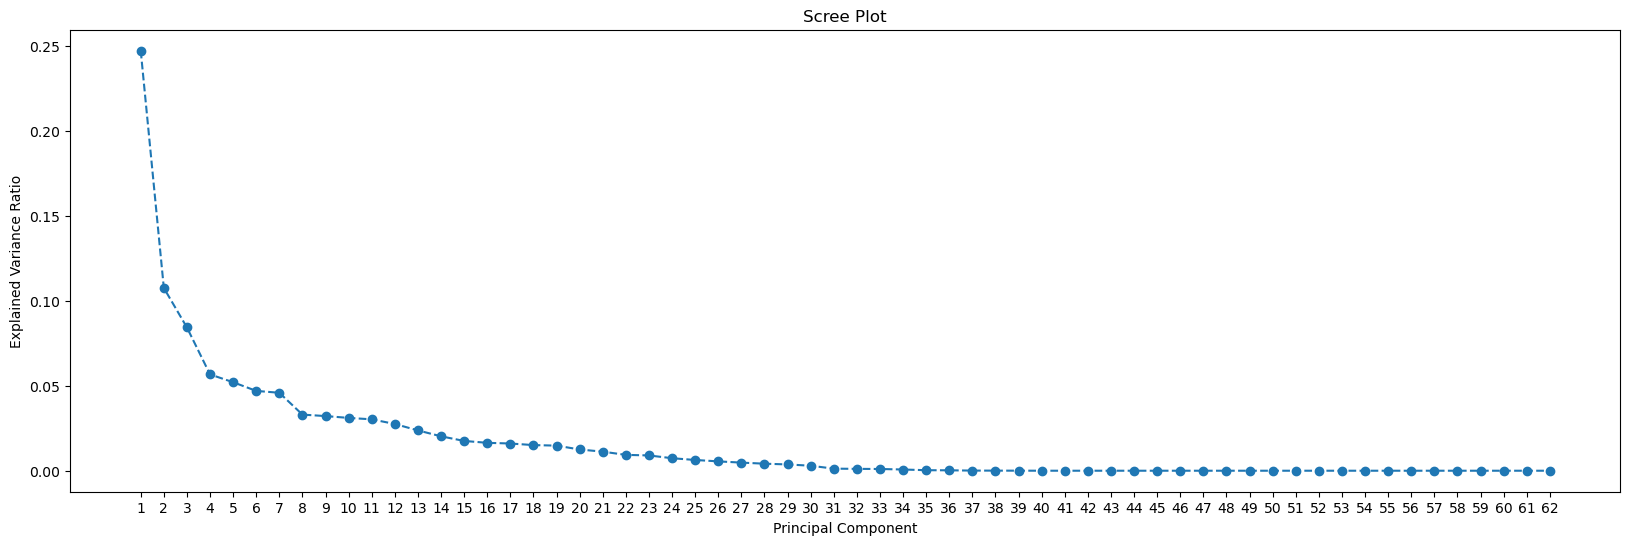

In [65]:
# Scree Plot
plt.figure(figsize=(20, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

Interpretation of This Plot:
The first few components capture a significant portion of the variance, suggesting they hold the most important information about the data.
Components beyond the elbow point contribute minimal variance, and including them might not provide substantial benefit.

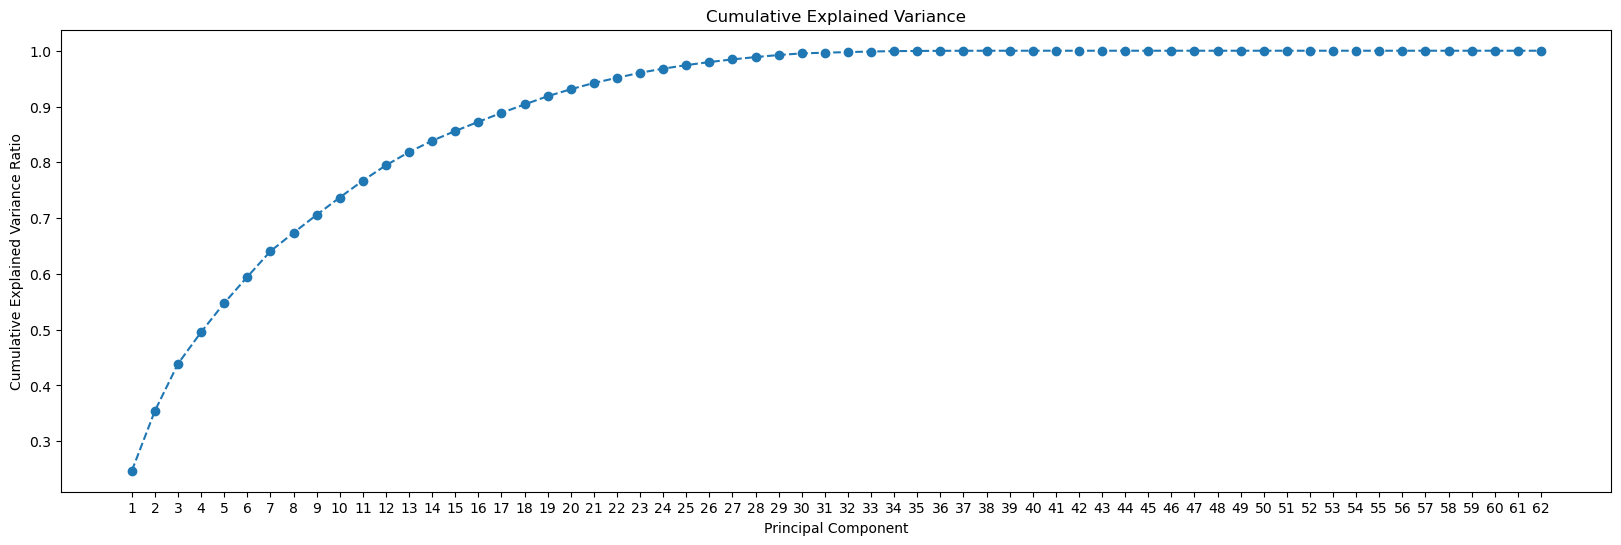

In [66]:
# Cumulative Explained Variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(20, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.show()

Contribution of Principal Components:

The first few components capture a significant portion of the total variance.
For instance, the first 10 components may explain 70%-80% of the variance.
Dimensionality Reduction Insight:

Helps determine the number of principal components to retain for dimensionality reduction while preserving most of the variance.
A common threshold is 90%-95% cumulative explained variance.
"Knee" or "Elbow" Point:

The point where the curve starts to flatten indicates the optimal number of components.
Beyond this point, adding more components results in diminishing returns in terms of explained variance.

Interpretation of This Plot:
The initial components capture the bulk of the variance.
If a threshold of 90% explained variance is desired, identify the number of components at which the curve reaches or exceeds 0.9 on the Y-axis.
Retaining fewer components while achieving a high explained variance can simplify the model and reduce computational costs.

In [67]:
# Displaying PCA components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(len(df_numeric.columns))])
print("PCA values for each column (first few rows):")
print(pca_df.head())

# Displaying explained variance ratio for each component
pca_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})
print("\nExplained Variance Ratio for each Principal Component:")
print(pca_variance_df)

PCA values for each column (first few rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.275097 -1.665247  0.025665  0.978037 -0.256810 -0.423218  0.509298   
1  3.018789  2.463578  0.350240 -0.303714 -0.720636 -0.451431  0.749915   
2  9.050201 -5.605511  0.027480  4.536975  1.767796 -2.350426 -0.236889   
3 -1.765984  1.246372  0.084649 -0.498429 -0.213522 -0.169972  0.073224   
4 -1.659986 -3.804349 -0.157161  1.653772  0.276796 -0.419332 -0.143803   

        PC8       PC9      PC10  ...          PC53          PC54  \
0  0.363776 -4.041892 -0.160786  ...  2.002408e-15  2.620416e-15   
1  0.329613 -4.001538 -0.496557  ...  2.110227e-15  6.074789e-15   
2  0.169848 -4.056518 -0.333976  ...  5.197030e-15  2.427807e-16   
3  0.732991 -3.824668  0.632695  ... -1.355101e-16 -4.148364e-15   
4  0.679840 -3.692123  0.182884  ...  1.130838e-15  1.797093e-15   

           PC55          PC56          PC57          PC58          PC59  \
0 -1.367771e-15 -6.0

In [68]:
import pandas as pd
pca_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})

top_30_components = pca_variance_df.sort_values(by='Explained Variance Ratio', ascending=False).head(30)
print("\nTop 30 Principal Components based on Explained Variance Ratio:")
print(top_30_components)

selected_columns = top_30_components['Principal Component'].tolist()
pca_df_top_30 = pca_df[selected_columns]

# Display the PCA values for the selected top 30 components (first few rows)
print("\nPCA values for the top 30 components (first few rows):")
print(pca_df_top_30.head())



Top 30 Principal Components based on Explained Variance Ratio:
   Principal Component  Explained Variance Ratio
0                  PC1                  0.247166
1                  PC2                  0.107557
2                  PC3                  0.084301
3                  PC4                  0.056670
4                  PC5                  0.052079
5                  PC6                  0.046971
6                  PC7                  0.045874
7                  PC8                  0.033026
8                  PC9                  0.032162
9                 PC10                  0.031081
10                PC11                  0.030244
11                PC12                  0.027508
12                PC13                  0.023723
13                PC14                  0.020252
14                PC15                  0.017527
15                PC16                  0.016424
16                PC17                  0.016012
17                PC18                  0.015087
18   

In [69]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming df_numeric is your original DataFrame with numeric features only
# Fit PCA on the data (already done)
pca = PCA()
pca.fit(df_numeric)

# Create a DataFrame of PCA components (loadings)
loadings_df = pd.DataFrame(
    pca.components_.T,  # Transpose so that rows correspond to original features
    columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    index=df_numeric.columns  # Use original feature names as index
)

# Display top features contributing to each principal component
print("Loadings of original features for each principal component:")
print(loadings_df)

# Select top 30 components based on variance (from previous step)
top_30_pcs = top_30_components['Principal Component'].tolist()
loadings_top_30 = loadings_df[top_30_pcs]

# Find the original features that have the highest absolute loading values for each of the top 30 PCs
top_features_for_each_pc = {}

for pc in top_30_pcs:
    # Get the absolute loadings for the principal component and sort to find top features
    top_features = loadings_top_30[pc].abs().sort_values(ascending=False).head(5)
    top_features_for_each_pc[pc] = top_features.index.tolist()

# Display the top contributing original features for each of the top 30 principal components
for pc, features in top_features_for_each_pc.items():
    print(f"\nTop contributing features for {pc}:")
    print(features)


Loadings of original features for each principal component:
                                      PC1           PC2           PC3  \
VendorID                    -9.509390e-06  3.992145e-05 -6.734152e-06   
passenger_count             -1.675060e-06  3.425834e-05 -1.113801e-04   
trip_distance                4.131395e-01  6.352364e-03 -6.974875e-03   
RatecodeID                   9.194177e-04  9.232501e-07 -1.205696e-02   
PULocationID                -3.243358e-03  3.735911e-04  3.679733e-01   
...                                   ...           ...           ...   
minmax_congestion_surcharge -1.994813e-05 -2.403132e-05  3.370896e-04   
minmax_trip_duration         1.357753e-07 -4.277267e-07 -3.972219e-06   
minmax_average_speed         4.774535e-07  8.134877e-09  3.617695e-09   
minmax_fare_per_mile        -1.676811e-07  9.977832e-06 -9.062034e-09   
minmax_tip_percentage       -5.393814e-07 -1.351813e-06  1.399321e-05   

                                      PC4           PC5        

In [70]:
# Threshold or number of top features to consider
num_top_features = 33  # Adjust this number based on how many top features you want per component

# Identify original features with high loadings in top principal components
selected_features = set()  # Use a set to avoid duplicates

for pc in top_30_pcs:
    # Get the absolute loadings for the principal component and sort to find top features
    top_features = loadings_top_30[pc].abs().sort_values(ascending=False).head(num_top_features)
    selected_features.update(top_features.index.tolist())

# Convert set to list for easier handling
selected_features = list(selected_features)

# Create a new DataFrame with only the selected high-weighted columns
df_reduced = df_numeric[selected_features]

In [71]:
print("Reduced DataFrame with high-weighted columns only:")
print(df_reduced.head())

Reduced DataFrame with high-weighted columns only:
   standardized_fare_amount  minmax_congestion_surcharge  log_trip_distance  \
0                  0.117276                          1.0           1.684545   
1                  0.683468                          1.0           2.164472   
2                  2.786464                          1.0           3.390810   
3                 -0.486661                          1.0           0.741937   
4                 -0.146946                          1.0           1.280934   

   tolls_amount  log_trip_duration  tip_percentage  log_fare_per_mile  \
0          0.00           2.786040        4.779686           1.960127   
1          0.00           2.732201       20.000000           1.922287   
2          6.94           3.593653        0.000000           1.356399   
3          0.00           2.299246       16.618076           2.808855   
4          0.00           2.685577        0.000000           2.188641   

   pickup_day  dropoff_day_of_week 

In [72]:
df_reduced.to_csv('df_reduced.csv')

# Hierarchical Clustering

To further visualize the hierarchical clustering process, you can plot the full dendrogram without truncation (if the dataset size allows), as well as color clusters based on a certain number of clusters. Additionally, you can plot a heatmap with a dendrogram on the side to illustrate both the similarity structure and the data values.

Below are various visualizations to enhance the analysis of hierarchical clustering:

1. Full Dendrogram
This dendrogram shows all levels of the hierarchical clustering process, which can provide insights into cluster formation at each step.

2. Dendrogram with Colored Clusters
Color clusters based on a set number of clusters to visually distinguish the groups.

3. Heatmap with Dendrogram
A heatmap with a dendrogram allows you to see both the hierarchical structure and the similarity of data points across features.



In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Select only numeric columns for clustering
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
df_numeric = df[numeric_columns]
# Replace infinity values with NaN
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values (or alternatively, you could fill them)
df_numeric = df_numeric.dropna()
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform hierarchical clustering
# Linkage matrix is computed using Ward's method, which minimizes variance within clusters
Z = linkage(df_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5)  # truncate_mode='level' limits the dendrogram depth for easier viewing
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

MemoryError: Unable to allocate 275. TiB for an array with shape (37731198330595,) and data type float64

# To overcome the above error we have to create a sample for the the data set

In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only numeric columns for clustering
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
df_numeric = df[numeric_columns]
# Replace infinity values with NaN
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values (or alternatively, you could fill them)
df_numeric = df_numeric.dropna()
# Step 2: Sample a subset of the data to reduce memory usage
sample_size = 30000  # Adjust based on memory capacity; smaller size may be necessary for very large data
df_sample = df_numeric.sample(n=sample_size, random_state=42)

# Step 3: Standardize the sampled data
scaler = StandardScaler()
df_scaled_sample = scaler.fit_transform(df_sample)

# Step 4: Perform hierarchical clustering on the sample
# Compute the linkage matrix using Ward's method, which minimizes variance within clusters
Z = linkage(df_scaled_sample, method='ward')

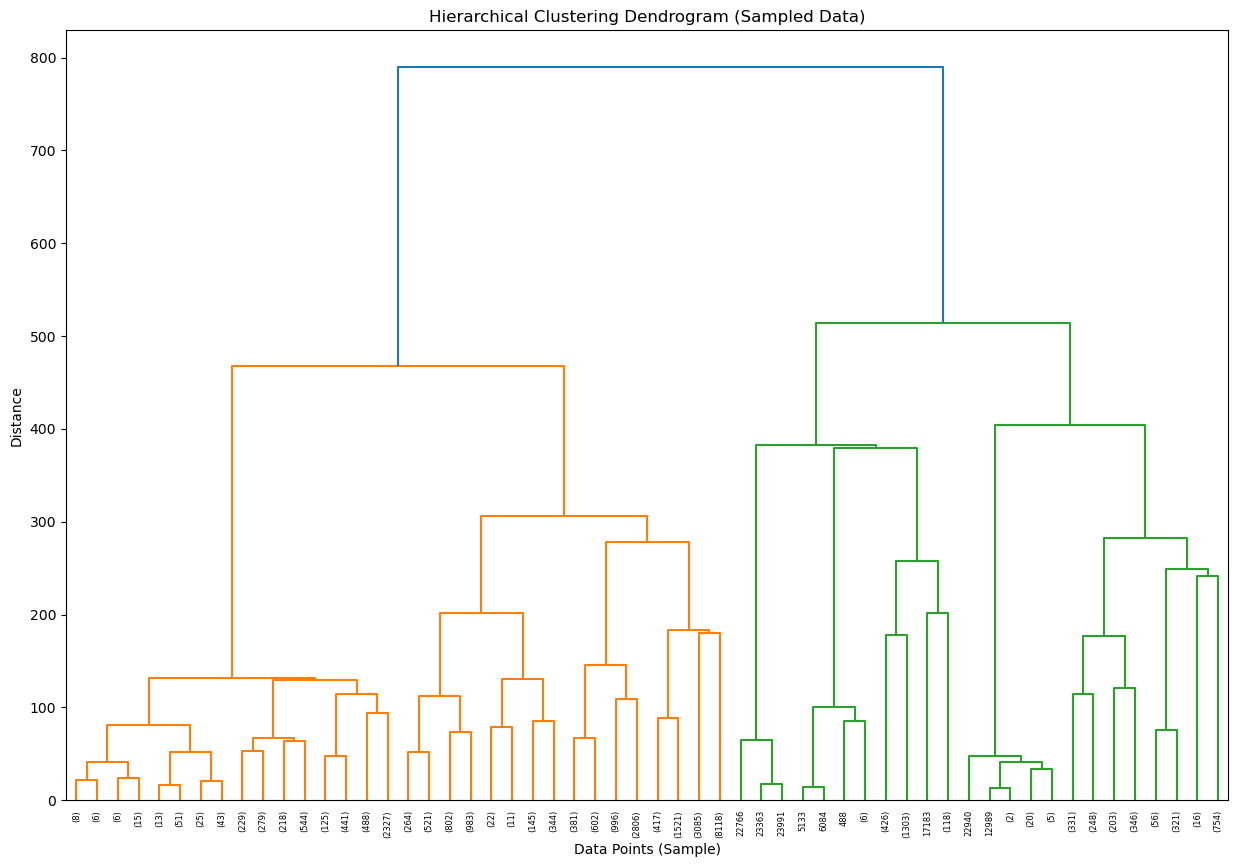

In [93]:
# Step 5: Plot the full dendrogram with truncation for readability
plt.figure(figsize=(15, 10))
dendrogram(Z, truncate_mode='level', p=5)  # Truncate the depth to show top levels of clusters
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Data Points (Sample)")
plt.ylabel("Distance")
plt.show()

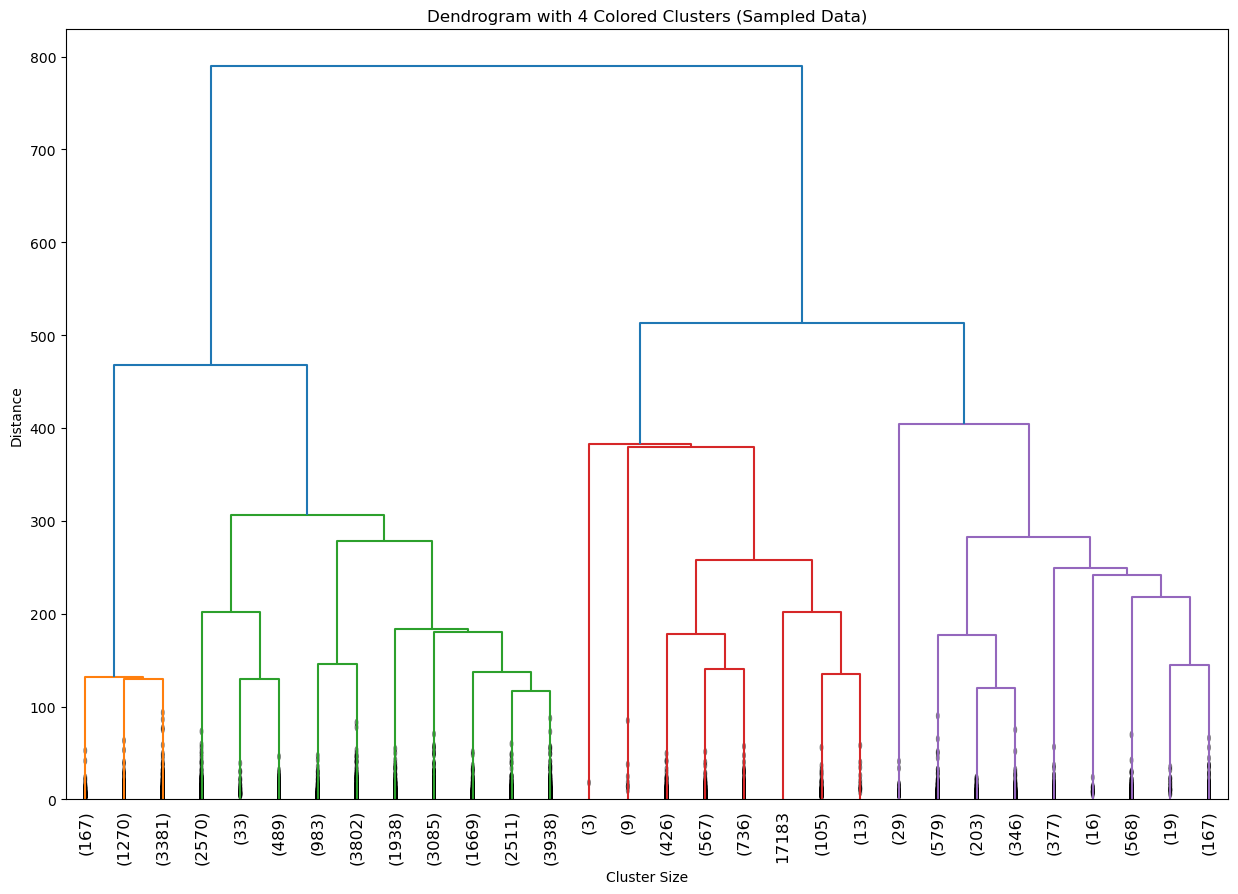

In [94]:
# Step 6: Dendrogram with Colored Clusters
# Define the number of clusters to visualize as colors in the dendrogram
num_clusters = 4
plt.figure(figsize=(15, 10))
dendrogram(Z, truncate_mode='lastp', p=30, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12,
           show_contracted=True, color_threshold=Z[-(num_clusters-1), 2])  # Color clusters by distance threshold
plt.title(f"Dendrogram with {num_clusters} Colored Clusters (Sampled Data)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

Interpretation of the Dendrogram:
Optimal Number of Clusters:

Decide the number of clusters by looking for a large vertical gap between merges, which indicates the best separation between clusters.
In this case, the four-colored clusters suggest a good partition of the data.
Cluster Composition:

Data points at the bottom of each colored segment belong to the same cluster.
You can further analyze these clusters to understand the patterns or features that define them.
Similarity Across Clusters:

Taller vertical lines indicate greater dissimilarity between clusters.
For example, the blue line dividing the left and right sections represents the two most dissimilar groups.


In [95]:
# Step 7: Apply clustering result to the sample data and create cluster labels
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
df_sample['Cluster_Label'] = cluster_labels

# GMM

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Select only numeric columns for clustering
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
df_numeric = df[numeric_columns]
# Replace infinity values with NaN
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values (or alternatively, you could fill them)
df_numeric = df_numeric.dropna()
# Step 2: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [22]:
# Step 3: Apply GMM Clustering
k = 4  # Number of clusters; adjust as needed
gmm = GaussianMixture(n_components=k, random_state=42)
df_numeric['Cluster'] = gmm.fit_predict(df_scaled)

In [23]:
# Step 4: Dimensionality Reduction for Visualization (2D and 3D)
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = df_numeric['Cluster']

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


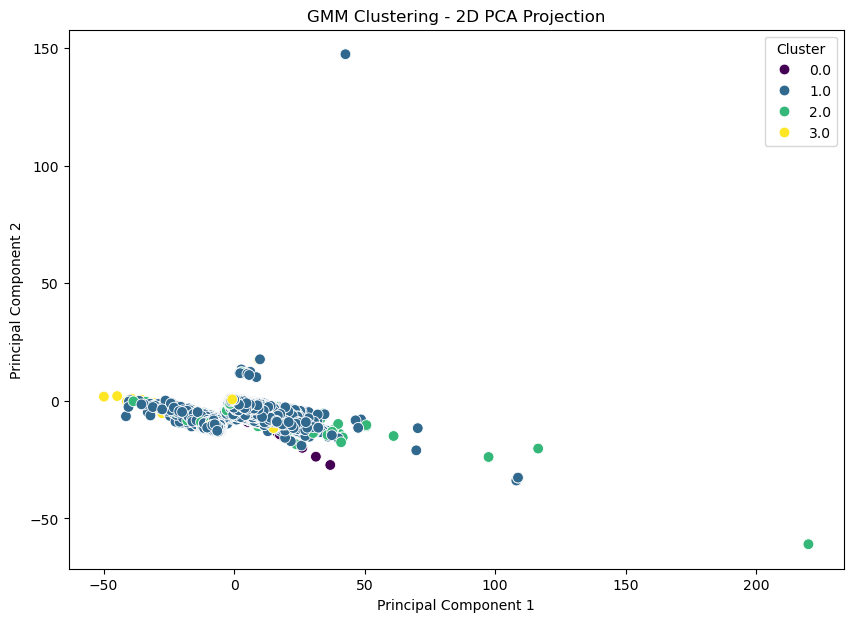

In [24]:
# 2D Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=60)
plt.title("GMM Clustering - 2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

Clusters Formed by GMM:

The points are grouped into four clusters based on the GMM algorithm.
Each cluster represents a different Gaussian distribution fitted to the data.
PCA for Visualization:

PCA reduces the dimensionality of the dataset while retaining most of the variance.
This makes it possible to visualize clusters in 2D, even if the original data has many features.
Cluster Characteristics:

Clusters vary in density and spread, depending on the data distribution and the covariance structure modeled by GMM.
For example, some clusters (e.g., Cluster 1) are tightly packed, while others (e.g., Cluster 2) have a broader spread.


Interpretation:
The plot helps to understand the clustering structure in reduced dimensions.
Use this visualization to:
Validate the separation of clusters.
Identify overlapping or poorly separated clusters.
Further analysis can explore cluster-specific characteristics or adjust the number of clusters for better results.

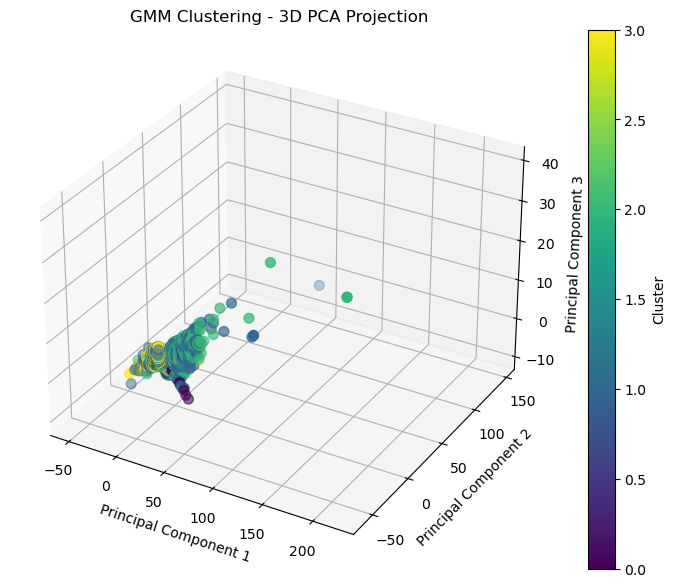

In [26]:
# 3D Visualization (optional, requires mpl_toolkits)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis', s=50)
ax.set_title("GMM Clustering - 3D PCA Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

Gaussian Mixture Model (GMM) Clustering Overview:
GMM is a probabilistic clustering algorithm that assumes the data is generated from a mixture of Gaussian distributions.
Each cluster is modeled as a Gaussian distribution, defined by:
Mean (center of the cluster).
Covariance (spread and shape of the cluster).
The algorithm assigns each point to a cluster based on probabilities, which allows for soft clustering (points can belong to multiple clusters with varying probabilities).

What This Plot Shows:
Cluster Assignments:

The plot visualizes the clusters formed by GMM in 3D space.
Each cluster is represented by a distinct color, showing how the points are grouped in the reduced dimensional space.
PCA for Dimensionality Reduction:

PCA reduces the dimensionality of the original dataset while retaining most of the variance.
The 3D projection simplifies visualization and helps assess cluster separability.
Cluster Separation:

The spatial separation of points shows how well-defined the clusters are.
Some clusters might overlap slightly, depending on the nature of the data and the covariance structure modeled by GMM.

Interpretation:
Cluster Compactness and Separation:

Compact clusters (e.g., points grouped closely together) indicate strong intra-cluster similarity.
Separation between clusters indicates inter-cluster dissimilarity.
Cluster Overlap:

Overlapping points in 3D space may indicate clusters with shared characteristics or weak separability.
Dimensionality Reduction:

Using three principal components provides more information about cluster structure compared to 2D visualization.

In [41]:
import dask.dataframe as dd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [47]:
import dask.dataframe as dd

# Assuming `df` is your pandas DataFrame
dask_df = dd.from_pandas(df, npartitions=10)  # Adjust the number of partitions as needed

In [53]:
dask_df.info()

<class 'dask_expr.DataFrame'>
Columns: 19 entries, VendorID to Airport_fee
dtypes: datetime64[us](2), float64(12), int32(3), int64(1), string(1)

In [55]:
dask_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-02-01 00:04:45   2024-02-01 00:19:58              1.0   
1         2  2024-02-01 00:56:31   2024-02-01 01:10:53              1.0   
2         2  2024-02-01 00:07:50   2024-02-01 00:43:12              2.0   
3         1  2024-02-01 00:01:49   2024-02-01 00:10:47              1.0   
4         1  2024-02-01 00:37:35   2024-02-01 00:51:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.39         1.0                  N            68           236   
1           7.71         1.0                  N            48           243   
2          28.69         2.0                  N           132           261   
3           1.10         1.0                  N           161           163   
4           2.60         1.0                  N           246            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         20.5    1.0      0.5        1.28          0.00   
1             1         31.0    1.0      0.5        9.00          0.00   
2             2         70.0    0.0      0.5        0.00          6.94   
3             1          9.3    3.5      0.5        2.85          0.00   
4             2         15.6    3.5      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         26.78                   2.5         0.00  
1                    1.0         45.00                   2.5         0.00  
2                    1.0         82.69                   2.5         1.75  
3                    1.0         17.15                   2.5         0.00  
4                    1.0         20.60                   2.5         0.00

In [57]:
# Handle datetime columns
dask_df['tpep_pickup_datetime'] = dd.to_datetime(dask_df['tpep_pickup_datetime'])
dask_df['tpep_dropoff_datetime'] = dd.to_datetime(dask_df['tpep_dropoff_datetime'])

# Derive useful features
dask_df['pickup_hour'] = dask_df['tpep_pickup_datetime'].dt.hour
dask_df['pickup_day'] = dask_df['tpep_pickup_datetime'].dt.day
dask_df['trip_duration'] = (dask_df['tpep_dropoff_datetime'] - dask_df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Duration in minutes


In [59]:
# Drop unnecessary columns for clustering
columns_to_drop = [
    'tpep_pickup_datetime', 
    'tpep_dropoff_datetime', 
    'store_and_fwd_flag', 
    'payment_type', 
    'RatecodeID', 
    'VendorID', 
    'Airport_fee'
]
dask_df = dask_df.drop(columns=columns_to_drop, axis=1)

In [61]:
dask_df = dask_df.fillna(0).replace([np.inf, -np.inf], 0)
sample_df = dask_df.sample(frac=0.1, random_state=42).compute()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sample_df)

In [63]:
# Perform MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=10000)  # Adjust batch_size
clusters = kmeans.fit_predict(X_scaled)

In [65]:
# Add cluster labels to the sampled DataFrame
sample_df['cluster'] = clusters

In [67]:
# Save the clustered data
sample_df.to_csv("clustered_sample.csv", index=False)
print("Clustering completed and saved to 'clustered_sample.csv'")

Clustering completed and saved to 'clustered_sample.csv'


In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

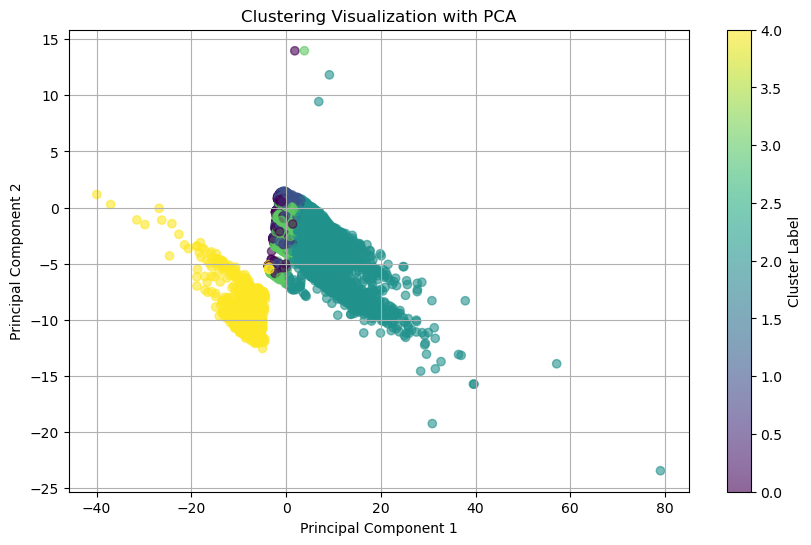

In [71]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster Label')
plt.title('Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

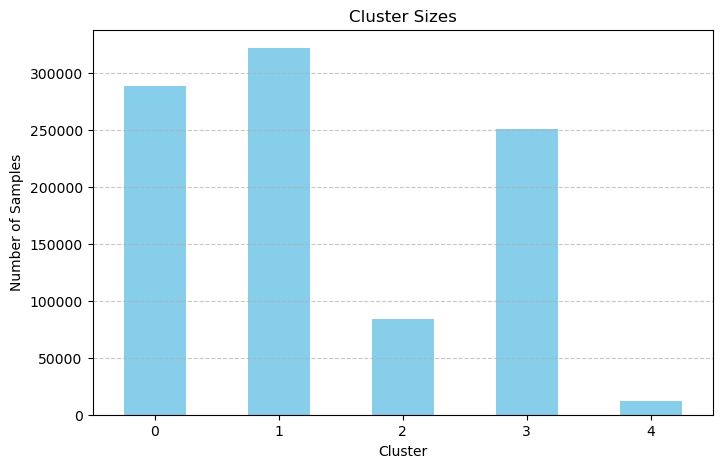

In [72]:
# Cluster size bar chart
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
plt.figure(figsize=(8, 5))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

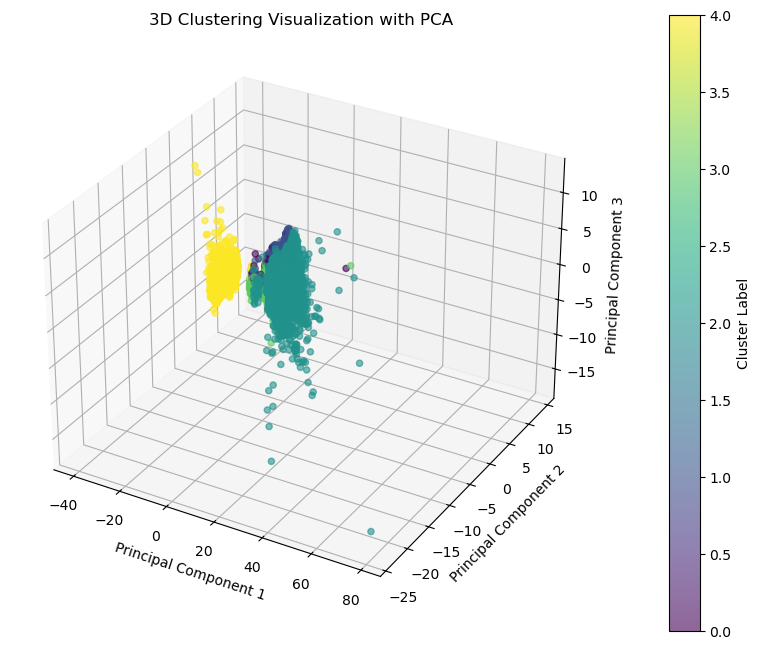

In [75]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3 for 3D visualization using PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D Scatter plot of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='viridis', alpha=0.6)
ax.set_title('3D Clustering Visualization with PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a color bar
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster Label')

plt.show()

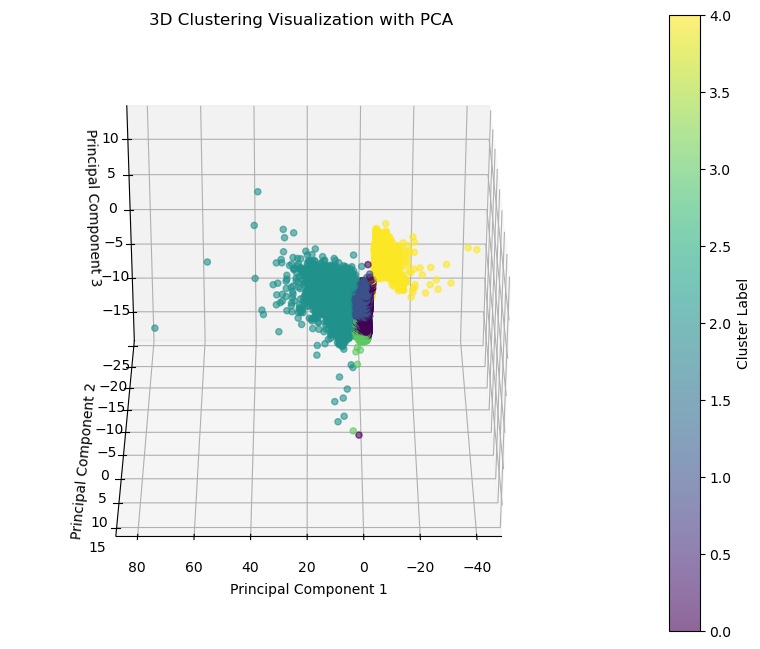

In [83]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3 for 3D visualization using PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D Scatter plot of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
    c=clusters, cmap='viridis', alpha=0.6
)
ax.set_title('3D Clustering Visualization with PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Rotate the graph by 90 degrees
ax.view_init(elev=30, azim=90)  # Change `elev` and `azim` as needed
# `elev`: elevation angle in the z plane
# `azim`: azimuthal angle (rotation in the x-y plane)

# Add a color bar
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster Label')

plt.show()


Cluster Structure:

The clusters are well-separated in 3D space, but some overlap is visible between teal and green clusters, which might need further investigation.
Dimensionality Insight:

While 3D projection captures significant variance, additional components might be necessary to resolve ambiguities in overlapping clusters.
Model Validation:

This visualization helps assess whether the clustering algorithm effectively groups similar data points.
Further evaluation metrics (e.g., silhouette score, Davies-Bouldin index) could complement this analysis.

Applications of the Plot:
Evaluate clustering results in a reduced dimension.
Gain insights into the separability of clusters for exploratory analysis.
Identify potential outliers or ambiguous data points in clusters.